# Environment Set-up

```bash
mamba create -n project-health python=3.11 jupyterlab -c conda-forge
mamba activate project-health  # activate our environment
jupyter lab               # this will start up jupyter lab and open a browser
```

# pre-install

In [1]:
!mamba install -c conda-forge -y matplotlib
!mamba install -y pandas
!mamba install -y numpy
!mamba install -c anaconda -y scikit-learn
!mamba install -c conda-forge -y kneed
!mamba install -c conda-forge -y seaborn
!mamba install -c conda-forge -y scikit-learn-extra


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.2) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['matplotlib']

error    libmamba Could not open lockfile '/opt/mambaforge/pkgs/cache/cache.lock'
er

In [73]:
  def jaccard_similarity(set_a, set_b):
    """Compute the Jaccard Similarity between two sets."""
    intersection = len(set_a.intersection(set_b))
    union = len(set_a.union(set_b))
    return intersection / union if union != 0 else 0.0

In [ ]:
from sklearn.metrics import precision_score, recall_score

def f_beta_score(P, R, beta=1.0):
    """
    Compute the F_beta score.

    Parameters:
    - P (float): Precision
    - R (float): Recall
    - beta (float): Weighting factor

    Returns:
    - float: F_beta score
    """
    if P + R == 0:
        return 0.0  # Handle edge case to avoid division by zero
    return (1 + beta**2) * P * R / (beta**2 * P + R)

def compute_f_beta_from_labels(true_labels, predicted_labels, beta=1.0):
    """
    Compute the F_beta score from true and predicted labels.

    Parameters:
    - true_labels (list): Ground truth labels
    - predicted_labels (list): Predicted labels from clustering or classification
    - beta (float): Weighting factor

    Returns:
    - float: F_beta score
    """
    P = precision_score(true_labels, predicted_labels, average='macro')
    R = recall_score(true_labels, predicted_labels, average='macro')
    return f_beta_score(P, R, beta)

# Example usage:
true_labels = [1, 0, 1, 2, 2, 0]
predicted_labels = [1, 1, 1, 2, 0, 0]
beta = 2

print(compute_f_beta_from_labels(true_labels, predicted_labels, beta))

# read data

In [43]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

In [44]:
import os

## read all of project

In [45]:
# Directory where the CSV files are located
directory = "./data/"

# Create an empty DataFrame to store the combined data
data = pd.DataFrame()
project_ID = 1
# Iterate over each file in the directory
for file in os.listdir(directory):
    if file.endswith(".csv"):
        # Construct full file path
        file_path = os.path.join(directory, file)
        
        # Read the CSV file and append it to the combined DataFrame
        inputData = pd.read_csv(file_path)
        # Adding an ID column with incremental values starting from 1
        inputData['ID'] = range(1, 1 + len(inputData))
        inputData['project_ID'] = project_ID
        project_ID = project_ID + 1
        # Concatenate the DataFrames
        data = pd.concat([data, inputData], ignore_index=True)

In [130]:
data

,monthly_commits,monthly_contributors,monthly_open_PRs,monthly_closed_PRs,monthly_merged_PRs,monthly_PR_mergers,monthly_PR_comments,monthly_open_issues,monthly_closed_issues,monthly_issue_comments,monthly_stargazer,monthly_forks,monthly_watchers,ID,project_ID
dates,,,,,,,,,,,,,,,
2016-01-01,9,1,2,0,2,1,0,0,5,3,20,7,0,1,1
2016-02-01,10,1,2,0,2,1,0,0,3,5,6,3,2,2,1
2016-03-01,2,2,1,0,1,1,0,0,2,2,18,4,1,3,1
2016-04-01,0,0,0,0,0,0,0,0,0,0,30,6,0,4,1
2016-05-01,0,0,0,0,0,0,0,0,0,0,16,6,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-01,0,0,0,0,0,0,0,0,0,0,18,2,0,49,1628
2019-02-01,0,0,0,0,0,0,0,0,0,0,9,1,0,50,1628
2019-03-01,0,0,0,0,0,0,0,0,0,0,15,3,1,51,1628


## only read first project 

In [204]:
data = pd.read_csv("./data/project0000.csv")
# Adding an ID column with incremental values starting from 1
data['ID'] = range(1, 1 + len(data))

In [205]:
type(data)

pandas.core.frame.DataFrame

In [206]:
data.head()

,dates,monthly_commits,monthly_contributors,monthly_open_PRs,monthly_closed_PRs,monthly_merged_PRs,monthly_PR_mergers,monthly_PR_comments,monthly_open_issues,monthly_closed_issues,monthly_issue_comments,monthly_stargazer,monthly_forks,monthly_watchers,ID
0,2016-12-01,123,1,0,0,0,0,0,10,23,23,0,0,0,1
1,2017-01-01,52,1,0,0,0,0,0,2,3,0,0,0,0,2
2,2017-02-01,40,1,0,0,0,0,0,1,5,0,0,0,0,3
3,2017-03-01,7,1,0,0,0,0,0,0,0,0,0,0,2,4
4,2017-04-01,1,1,0,0,0,0,0,0,0,0,0,0,3,5


## Converting date/time strings to datetime objects
To efficiently work with time series, we need to convert date or time strings to datetime objects using the pandas.to_datetime function:

In [47]:
data['dates'] = pd.to_datetime(data['dates'])
print(data['dates'].dtypes)

datetime64[ns]


Setting a datetime column as a dataframe index
Now, let's set the Date column as a dataframe index using the set_index method:

In [48]:
data = data.set_index('dates')
data.head()

,monthly_commits,monthly_contributors,monthly_open_PRs,monthly_closed_PRs,monthly_merged_PRs,monthly_PR_mergers,monthly_PR_comments,monthly_open_issues,monthly_closed_issues,monthly_issue_comments,monthly_stargazer,monthly_forks,monthly_watchers,ID,project_ID
dates,,,,,,,,,,,,,,,
2016-01-01,9,1,2,0,2,1,0,0,5,3,20,7,0,1,1
2016-02-01,10,1,2,0,2,1,0,0,3,5,6,3,2,2,1
2016-03-01,2,2,1,0,1,1,0,0,2,2,18,4,1,3,1
2016-04-01,0,0,0,0,0,0,0,0,0,0,30,6,0,4,1
2016-05-01,0,0,0,0,0,0,0,0,0,0,16,6,0,5,1


There are 13 features
'monthly_commits', 'monthly_contributors', 'monthly_open_PRs', 'monthly_closed_PRs', 'monthly_merged_PRs', 'monthly_PR_mergers', 'monthly_PR_comments', 'monthly_open_issues', 'monthly_closed_issues', 'monthly_issue_comments', 'monthly_stargazer', 'monthly_forks', 'monthly_watchers'

+ Category 1 (project activity): 'monthly_commits', 'monthly_contributors','monthly_stargazer', 'monthly_forks', 'monthly_watchers'
+ Category 2 (PRs): 'monthly_open_PRs', 'monthly_closed_PRs', 'monthly_merged_PRs', 'monthly_PR_mergers', 'monthly_PR_comments'
+ Category 3 (issues): 'monthly_open_issues', 'monthly_closed_issues', 'monthly_issue_comments'
+ Category 4 (open): 'monthly_open_PRs', 'monthly_open_issues'
+ Category 5 (close): 'monthly_closed_PRs', 'monthly_merged_PRs', 'monthly_closed_issues', 'monthly_issue_comments'

# data visualization

Creating a basic single-line matplotlib time series plot
To create a basic time series line plot, we use the standard matplotlib.pyplot.plot(x, y) method:

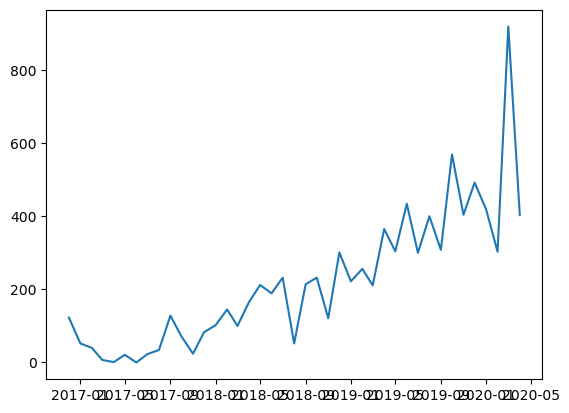

In [212]:
plt.plot(data.index, data['monthly_commits'])

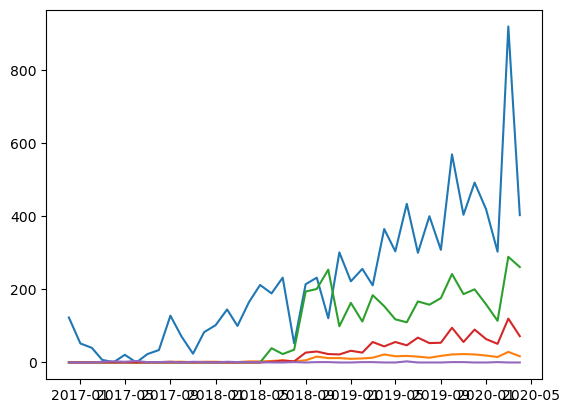

In [213]:
for col in ['monthly_commits', 'monthly_contributors','monthly_stargazer', 'monthly_forks', 'monthly_watchers']:
    plt.plot(data.index, data[col])

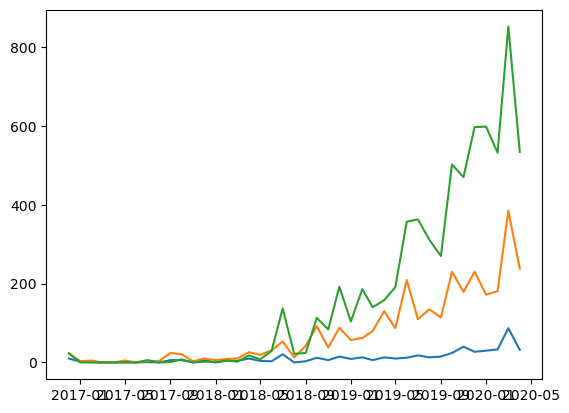

In [214]:
for col in ['monthly_open_issues', 'monthly_closed_issues', 'monthly_issue_comments']:
    plt.plot(data.index, data[col])

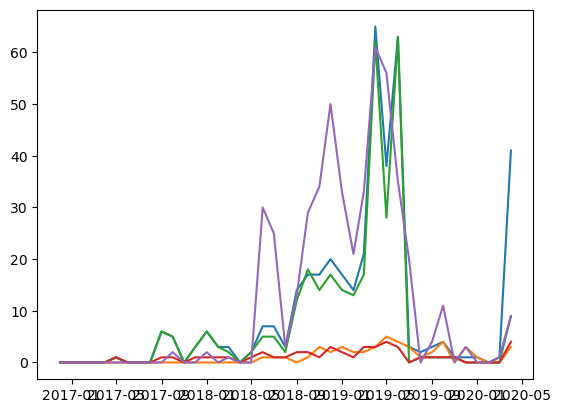

In [215]:
for col in ['monthly_open_PRs', 'monthly_closed_PRs', 'monthly_merged_PRs', 'monthly_PR_mergers', 'monthly_PR_comments']:
    plt.plot(data.index, data[col])

# Random Projection

In [49]:
import random
import numpy as np
import math
import os
import pandas as pd
import time
#from scipy.io import arff

In [50]:
class random_projection:
    def __init__(self, data, stop_depth):
        self.data = data.to_numpy()
        self.stop_depth = stop_depth
        self.res = self.cluster(self.data, self.stop_depth, [])
        #print (self.res)
        self.NumOfCluster = self.setNumOfCluster()
        #print (self.NumOfCluster)
        self.labels = np.ones(data.shape[0])
        self.setLabels()
        #print("Array of ones:", self.labels)

    def setLabels(self):
        for m in range(self.NumOfCluster):
            #print(m)
            for n in range(len(self.res[m])):
                row = self.getMatchedRowsIndices(self.res[m][n], self.data)
                #print (row)
                self.labels[row] = m
                
    def getLabels(self):
        return self.labels
        
    def getNumOfCluster(self):
        return self.NumOfCluster
        
    def setNumOfCluster(self):
        return len(self.res)
        
    @staticmethod    
    def getMatchedRowsIndices(target_row, array):
        # Make sure the target row has the right shape
        if target_row.shape[0] != array.shape[1]:
            print("The target row does not have the same number of elements as the array rows.")
        else:
            # Compare each row in the array with the target row
            matches = np.all(array == target_row, axis=1)
    
            # Use np.where to find the indices of matches
            row_indices = np.where(matches)[0]
    
            return row_indices
            
    def cluster(self, candidates, enough, res):
        if len(candidates) < enough:
            res.append(candidates)
            return res
    
        east, west, east_items, west_items = self.split(candidates)
        res = self.cluster(east_items, enough, res)
        res = self.cluster(west_items, enough, res)
    
        return res


    def split(self, candidates):
        pivot = random.choice(candidates)
        east_pivot = self.find_farest(pivot, candidates)
        west_pivot = self.find_farest(east_pivot, candidates)
        c = self.cal_distance(east_pivot, west_pivot)
    
        if c == 0:
            east_items = candidates[:len(candidates)//2]
            west_items = candidates[len(candidates)//2:]
            return east_pivot, west_pivot, east_items, west_items
    
        all_distance = []
        for candidate in candidates:
            a = self.cal_distance(candidate, west_pivot)
            b = self.cal_distance(candidate, east_pivot)
            d = (a ** 2 + c ** 2 - b ** 2) / (2 * c)
            all_distance.append((d, candidate))
    
        all_distance.sort(key=lambda x: x[0])
        sorted_candidates = [item[1] for item in all_distance]
        east_items = sorted_candidates[:len(sorted_candidates)//2]
        west_items = sorted_candidates[len(sorted_candidates)//2:]
    
        return east_pivot, west_pivot, east_items, west_items
    
    @staticmethod
    def find_farest(pivot, candidates):
        max_d = 0
        most_point = pivot
    
        for candidate in candidates:
            cur_d = random_projection.cal_distance(pivot, candidate)
            if  cur_d > max_d:
                max_d = cur_d
                most_point = candidate
        
        return most_point
    
    @staticmethod
    def cal_distance(p1, p2):
        return math.sqrt(sum([(v1 - v2) ** 2 for v1, v2 in zip(p1[:-1], p2[:-1])]))


In [51]:
def add_labels_to_df(df, labels_data, labels_name):
    if len(labels_data) == len(df):
        # Adding the new column
        df[labels_name] = labels_data
    else:
        print("The length of the ndarray does not match the number of DataFrame rows.")

    # Convert 'my_column' to int
    df[labels_name] = df[labels_name].astype(int)

# Activity

In [263]:
activity_columns = data[['monthly_commits', 'monthly_contributors','monthly_stargazer', 'monthly_forks', 'monthly_watchers']]

## PCA

In [143]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(activity_columns)

# Applying PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Creating a DataFrame for the principal components
pca_activity = pd.DataFrame(data=principal_components, columns=['PCA1', 'PCA2'])

print(pca_activity.head())

# Explained variance
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance: {explained_variance}")

       PCA1      PCA2
0 -0.868327  0.253907
1 -0.648275  0.437380
2 -0.721472  0.298856
3 -0.987335  0.418579
4 -1.037285  0.378712
Explained Variance: [0.38711819 0.2637421 ]


In [112]:
pca_activity.to_csv('./result/pca_activity.csv', index=False)

## random projection

In [264]:
activity_columns_random_projection = random_projection(activity_columns, 3000)
activity_columns_random_projection_labels = activity_columns_random_projection.getLabels()
add_labels_to_df(activity_columns, activity_columns_random_projection_labels, 'activity_random_projection_labels')

/tmp/ipykernel_2043/1831333637.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[labels_name] = labels_data
/tmp/ipykernel_2043/1831333637.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[labels_name] = df[labels_name].astype(int)


In [265]:
print ("Num Of Cluster:", activity_columns_random_projection.getNumOfCluster())

Num Of Cluster: 32


In [266]:
activity_columns

,monthly_commits,monthly_contributors,monthly_stargazer,monthly_forks,monthly_watchers,activity_random_projection_labels
dates,,,,,,
2016-01-01,9,1,20,7,0,7
2016-02-01,10,1,6,3,2,3
2016-03-01,2,2,18,4,1,4
2016-04-01,0,0,30,6,0,20
2016-05-01,0,0,16,6,0,6
...,...,...,...,...,...,...
2019-01-01,0,0,18,2,0,1
2019-02-01,0,0,9,1,0,0
2019-03-01,0,0,15,3,1,0


In [267]:
activity_columns.to_csv('./result/activity_with_random_projection_labels.csv', index=False)

# issues

In [268]:
issues_columns = data[[ 'monthly_open_issues', 'monthly_closed_issues', 'monthly_issue_comments']]

## PCA

In [58]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(issues_columns)

# Applying PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Creating a DataFrame for the principal components
pca_issues = pd.DataFrame(data=principal_components, columns=['PCA1', 'PCA2'])

print(pca_issues.head())

# Explained variance
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance: {explained_variance}")

       PCA1      PCA2
0 -0.644538  0.150009
1 -0.663459  0.140705
2 -0.683910  0.130570
3 -0.713822  0.115782
4 -0.713822  0.115782
Explained Variance: [0.70385417 0.24212711]


In [116]:
pca_issues.to_csv('./result/pca_issues.csv', index=False)

## random projection

In [269]:
issues_columns_random_projection = random_projection(issues_columns, 3000)
issues_columns_random_projection_labels = issues_columns_random_projection.getLabels()
add_labels_to_df(issues_columns, issues_columns_random_projection_labels, 'issues_random_projection_labels')

/tmp/ipykernel_2043/1831333637.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[labels_name] = labels_data
/tmp/ipykernel_2043/1831333637.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[labels_name] = df[labels_name].astype(int)


In [270]:
print ("Num Of Cluster:", issues_columns_random_projection.getNumOfCluster())

Num Of Cluster: 32


In [271]:
issues_columns

,monthly_open_issues,monthly_closed_issues,monthly_issue_comments,issues_random_projection_labels
dates,,,,
2016-01-01,0,5,3,5
2016-02-01,0,3,5,5
2016-03-01,0,2,2,1
2016-04-01,0,0,0,11
2016-05-01,0,0,0,11
...,...,...,...,...
2019-01-01,0,0,0,11
2019-02-01,0,0,0,11
2019-03-01,0,0,0,11


In [272]:
issues_columns.to_csv('./result/issues_with_random_projection_labels.csv', index=False)

# PRs

In [273]:
PRs_columns = data[['monthly_open_PRs', 'monthly_closed_PRs', 'monthly_merged_PRs', 'monthly_PR_mergers', 'monthly_PR_comments']]

## PCA

In [62]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(PRs_columns)

# Applying PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Creating a DataFrame for the principal components
pca_PRs = pd.DataFrame(data=principal_components, columns=['PCA1', 'PCA2'])

print(pca_PRs.head())

# Explained variance
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance: {explained_variance}")

       PCA1      PCA2
0 -0.668671 -0.205181
1 -0.668671 -0.205181
2 -0.730706 -0.185008
3 -1.051280  0.121150
4 -1.051280  0.121150
Explained Variance: [0.69913694 0.1442029 ]


In [118]:
pca_PRs.to_csv('./result/pca_PRs.csv', index=False)

## random projection

In [274]:
PRs_columns_random_projection = random_projection(PRs_columns, 3000)
PRs_columns_random_projection_labels = PRs_columns_random_projection.getLabels()
add_labels_to_df(PRs_columns, PRs_columns_random_projection_labels, 'PRs_random_projection_labels')

/tmp/ipykernel_2043/1831333637.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[labels_name] = labels_data
/tmp/ipykernel_2043/1831333637.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[labels_name] = df[labels_name].astype(int)


In [275]:
print ("Num Of Cluster:", PRs_columns_random_projection.getNumOfCluster())

Num Of Cluster: 32


In [276]:
PRs_columns

,monthly_open_PRs,monthly_closed_PRs,monthly_merged_PRs,monthly_PR_mergers,monthly_PR_comments,PRs_random_projection_labels
dates,,,,,,
2016-01-01,2,0,2,1,0,18
2016-02-01,2,0,2,1,0,18
2016-03-01,1,0,1,1,0,7
2016-04-01,0,0,0,0,0,14
2016-05-01,0,0,0,0,0,14
...,...,...,...,...,...,...
2019-01-01,0,0,0,0,0,14
2019-02-01,0,0,0,0,0,14
2019-03-01,0,0,0,0,0,14


In [277]:
PRs_columns.to_csv('./result/PRs_with_random_projection_labels.csv', index=False)

# open

In [278]:
open_columns = data[['monthly_open_PRs', 'monthly_open_issues']]

## PCA

In [66]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(open_columns)

# Applying PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Creating a DataFrame for the principal components
pca_open = pd.DataFrame(data=principal_components, columns=['PCA1', 'PCA2'])

print(pca_open.head())

# Explained variance
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance: {explained_variance}")

       PCA1      PCA2
0 -0.573619 -0.021453
1 -0.573619 -0.021453
2 -0.614117  0.019045
3 -0.654616  0.059544
4 -0.654616  0.059544
Explained Variance: [0.60607942 0.39392058]


In [120]:
pca_open.to_csv('./result/pca_open.csv', index=False)

## random projection

In [279]:
open_columns_random_projection = random_projection(open_columns, 3000)
open_columns_random_projection_labels = open_columns_random_projection.getLabels()
add_labels_to_df(open_columns, open_columns_random_projection_labels, 'open_random_projection_labels')

/tmp/ipykernel_2043/1831333637.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[labels_name] = labels_data
/tmp/ipykernel_2043/1831333637.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[labels_name] = df[labels_name].astype(int)


In [280]:
print ("Num Of Cluster:", open_columns_random_projection.getNumOfCluster())

Num Of Cluster: 32


In [281]:
open_columns

,monthly_open_PRs,monthly_open_issues,open_random_projection_labels
dates,,,
2016-01-01,2,0,17
2016-02-01,2,0,17
2016-03-01,1,0,7
2016-04-01,0,0,15
2016-05-01,0,0,15
...,...,...,...
2019-01-01,0,0,15
2019-02-01,0,0,15
2019-03-01,0,0,15


In [282]:
open_columns.to_csv('./result/open_with_random_projection_labels.csv', index=False)

# close

In [283]:
close_columns = data[['monthly_closed_PRs', 'monthly_merged_PRs', 'monthly_closed_issues']]

## PCA

In [70]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(close_columns)

# Applying PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Creating a DataFrame for the principal components
pca_close = pd.DataFrame(data=principal_components, columns=['PCA1', 'PCA2'])

print(pca_close.head())

# Explained variance
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance: {explained_variance}")

       PCA1      PCA2
0 -0.616074 -0.007433
1 -0.638072 -0.031524
2 -0.689291 -0.050654
3 -0.751509 -0.081830
4 -0.751509 -0.081830
Explained Variance: [0.60368273 0.22598764]


In [122]:
pca_close.to_csv('./result/pca_close.csv', index=False)

## random_projection

In [284]:
close_columns_random_projection = random_projection(close_columns, 3000)
close_columns_random_projection_labels = close_columns_random_projection.getLabels()
add_labels_to_df(close_columns, close_columns_random_projection_labels, 'close_random_projection_labels')

/tmp/ipykernel_2043/1831333637.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[labels_name] = labels_data
/tmp/ipykernel_2043/1831333637.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[labels_name] = df[labels_name].astype(int)


In [285]:
print ("Num Of Cluster:", close_columns_random_projection.getNumOfCluster())

Num Of Cluster: 32


In [286]:
close_columns

,monthly_closed_PRs,monthly_merged_PRs,monthly_closed_issues,close_random_projection_labels
dates,,,,
2016-01-01,0,2,5,18
2016-02-01,0,2,3,18
2016-03-01,0,1,2,17
2016-04-01,0,0,0,11
2016-05-01,0,0,0,11
...,...,...,...,...
2019-01-01,0,0,0,11
2019-02-01,0,0,0,11
2019-03-01,0,0,0,11


In [287]:
close_columns.to_csv('./result/close_with_random_projection_labels.csv', index=False)

# jaccard similarity

activity_labels
issues_labels
PRs_labels
close_columns
open_columns

In [255]:
similarity = jaccard_similarity(set(activity_columns["random_projection_labels"]), set(issues_columns["random_projection_labels"]))
print(f"Jaccard Similarity: {similarity}")

Jaccard Similarity: 0.90625


In [256]:
similarity = jaccard_similarity(set(activity_columns["random_projection_labels"]), set(PRs_columns["random_projection_labels"]))
print(f"Jaccard Similarity: {similarity}")

Jaccard Similarity: 0.71875


In [257]:
similarity = jaccard_similarity(set(PRs_columns["random_projection_labels"]), set(issues_columns["random_projection_labels"]))
print(f"Jaccard Similarity: {similarity}")

Jaccard Similarity: 0.625


In [258]:
similarity = jaccard_similarity(set(open_columns["random_projection_labels"]), set(close_columns["random_projection_labels"]))
print(f"Jaccard Similarity: {similarity}")

Jaccard Similarity: 0.6666666666666666


## finding symmetric difference

In [288]:
activity = pd.read_csv("./result/activity_with_random_projection_labels.csv")
issues = pd.read_csv("./result/issues_with_random_projection_labels.csv")
PRs = pd.read_csv("./result/PRs_with_random_projection_labels.csv")
open = pd.read_csv("./result/open_with_random_projection_labels.csv")
close = pd.read_csv("./result/close_with_random_projection_labels.csv")

In [289]:
activity

,monthly_commits,monthly_contributors,monthly_stargazer,monthly_forks,monthly_watchers,activity_random_projection_labels
0,9,1,20,7,0,7
1,10,1,6,3,2,3
2,2,2,18,4,1,4
3,0,0,30,6,0,20
4,0,0,16,6,0,6
...,...,...,...,...,...,...
78440,0,0,18,2,0,1
78441,0,0,9,1,0,0
78442,0,0,15,3,1,0
78443,0,0,12,2,0,0


In [290]:
# Concatenate DataFrames horizontally
activity_issues = pd.concat([activity, issues], axis=1)

In [291]:
activity_issues

,monthly_commits,monthly_contributors,monthly_stargazer,monthly_forks,monthly_watchers,activity_random_projection_labels,monthly_open_issues,monthly_closed_issues,monthly_issue_comments,issues_random_projection_labels
0,9,1,20,7,0,7,0,5,3,5
1,10,1,6,3,2,3,0,3,5,5
2,2,2,18,4,1,4,0,2,2,1
3,0,0,30,6,0,20,0,0,0,11
4,0,0,16,6,0,6,0,0,0,11
...,...,...,...,...,...,...,...,...,...,...
78440,0,0,18,2,0,1,0,0,0,11
78441,0,0,9,1,0,0,0,0,0,11
78442,0,0,15,3,1,0,0,0,0,11
78443,0,0,12,2,0,0,0,0,0,11


In [292]:
# Concatenate DataFrames horizontally
open_close = pd.concat([open, close], axis=1)

In [295]:
open_close

,monthly_open_PRs,monthly_open_issues,open_random_projection_labels,monthly_closed_PRs,monthly_merged_PRs,monthly_closed_issues,close_random_projection_labels
0,2,0,17,0,2,5,18
1,2,0,17,0,2,3,18
2,1,0,7,0,1,2,17
3,0,0,15,0,0,0,11
4,0,0,15,0,0,0,11
...,...,...,...,...,...,...,...
78440,0,0,15,0,0,0,11
78441,0,0,15,0,0,0,11
78442,0,0,15,0,0,0,11
78443,0,0,15,0,0,0,11


# K-means

In [ ]:
pca_close
pca_open
pca_activity
pca_issues
pca_PRs

In [84]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def kmeans(data, number_of_clusters):
    feature_labels = 'k-means_labels'
    
    df = pd.DataFrame(data, columns=['PCA1', 'PCA2'])

    # Number of clusters
    k = number_of_clusters

    # Create and fit KMeans model
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)

    # Get cluster labels and centers
    labels = kmeans.labels_
    cluster_centers = kmeans.cluster_centers_

    # Visualize the clusters
    plt.scatter(df['PCA1'], df['PCA2'], c=labels, cmap='viridis')
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=200)
    plt.show()

    # add labels as new column
    data[feature_labels] = labels

In [91]:
kmeans_activity = pca_activity[['PCA1', 'PCA2']]

/home/yanboyang713/.conda/envs/project-health/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


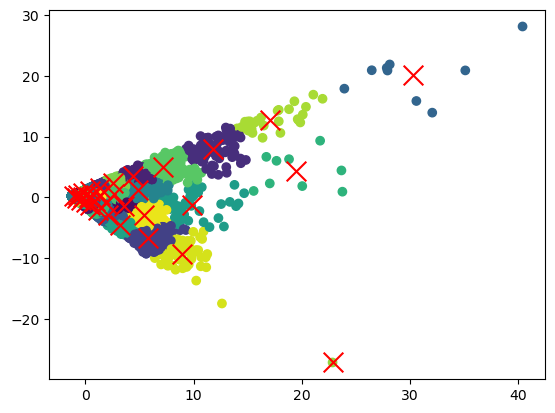

In [191]:
kmeans(kmeans_activity, close_columns_random_projection.getNumOfCluster())

In [192]:
kmeans_activity

,PCA1,PCA2,k-means_labels
0,-0.868327,0.253907,13
1,-0.648275,0.437380,0
2,-0.721472,0.298856,0
3,-0.987335,0.418579,13
4,-1.037285,0.378712,13
...,...,...,...
78440,-1.142859,0.301209,13
78441,-1.203147,0.254781,13
78442,-0.936433,0.470274,13
78443,-1.164266,0.284124,13


In [193]:
kmeans_activity.to_csv('./result/activity_with_kmeans_labels.csv', index=False)

/home/yanboyang713/.conda/envs/project-health/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


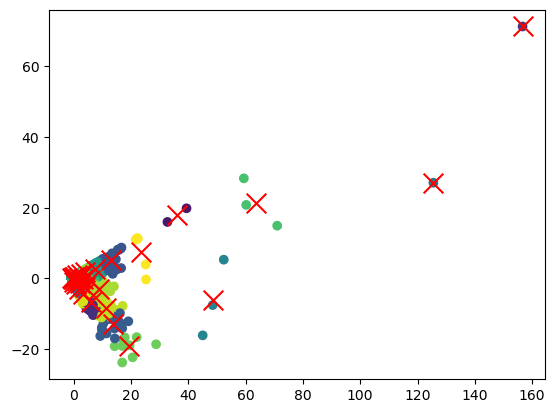

In [194]:
kmeans_issues = pca_issues[['PCA1', 'PCA2']]
kmeans(kmeans_issues, close_columns_random_projection.getNumOfCluster())

In [195]:
kmeans_issues

,PCA1,PCA2,k-means_labels
0,-0.644538,0.150009,18
1,-0.663459,0.140705,18
2,-0.683910,0.130570,18
3,-0.713822,0.115782,18
4,-0.713822,0.115782,18
...,...,...,...
78440,-0.713822,0.115782,18
78441,-0.713822,0.115782,18
78442,-0.713822,0.115782,18
78443,-0.713822,0.115782,18


In [196]:
kmeans_issues.to_csv('./result/issues_with_kmeans_labels.csv', index=False)

/home/yanboyang713/.conda/envs/project-health/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


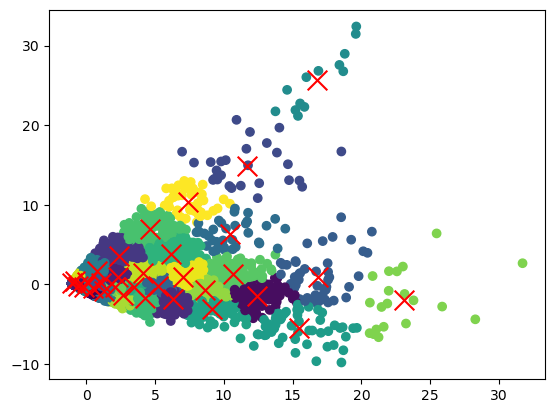

In [197]:
kmeans_PRs = pca_PRs[['PCA1', 'PCA2']]
kmeans(kmeans_PRs, close_columns_random_projection.getNumOfCluster())

In [198]:
kmeans_PRs

,PCA1,PCA2,k-means_labels
0,-0.668671,-0.205181,2
1,-0.668671,-0.205181,2
2,-0.730706,-0.185008,2
3,-1.051280,0.121150,6
4,-1.051280,0.121150,6
...,...,...,...
78440,-1.051280,0.121150,6
78441,-1.051280,0.121150,6
78442,-1.051280,0.121150,6
78443,-1.051280,0.121150,6


In [199]:
kmeans_PRs.to_csv('./result/PRs_with_kmeans_labels.csv', index=False)

/home/yanboyang713/.conda/envs/project-health/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


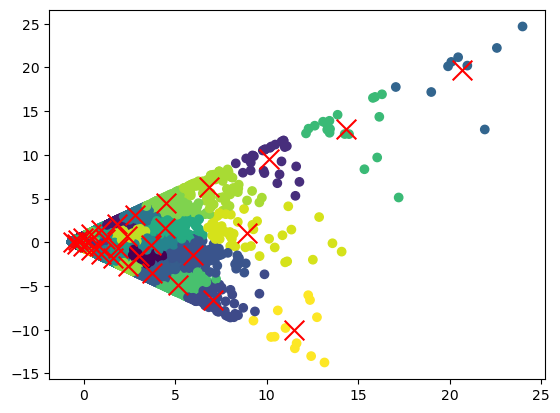

In [200]:
kmeans_open = pca_open[['PCA1', 'PCA2']]
kmeans(kmeans_open, close_columns_random_projection.getNumOfCluster())

In [201]:
kmeans_open

,PCA1,PCA2,k-means_labels
0,-0.573619,-0.021453,11
1,-0.573619,-0.021453,11
2,-0.614117,0.019045,11
3,-0.654616,0.059544,11
4,-0.654616,0.059544,11
...,...,...,...
78440,-0.654616,0.059544,11
78441,-0.654616,0.059544,11
78442,-0.654616,0.059544,11
78443,-0.654616,0.059544,11


In [202]:
kmeans_open.to_csv('./result/open_with_kmeans_labels.csv', index=False)

/home/yanboyang713/.conda/envs/project-health/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


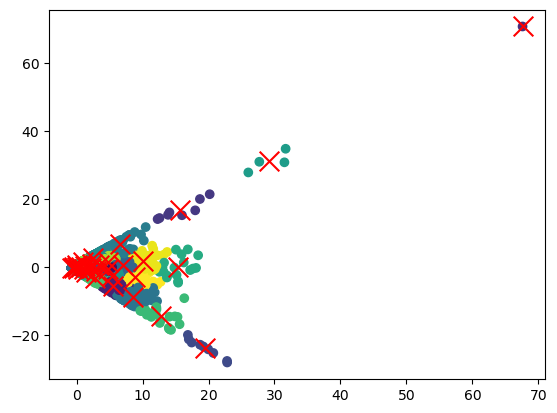

In [203]:
kmeans_close = pca_close[['PCA1', 'PCA2']]
kmeans(kmeans_close, close_columns_random_projection.getNumOfCluster())

In [204]:
kmeans_close

,PCA1,PCA2,k-means_labels
0,-0.616074,-0.007433,11
1,-0.638072,-0.031524,11
2,-0.689291,-0.050654,11
3,-0.751509,-0.081830,11
4,-0.751509,-0.081830,11
...,...,...,...
78440,-0.751509,-0.081830,11
78441,-0.751509,-0.081830,11
78442,-0.751509,-0.081830,11
78443,-0.751509,-0.081830,11


In [205]:
kmeans_close.to_csv('./result/close_with_kmeans_labels.csv', index=False)

In [206]:
kmeans_issues

,PCA1,PCA2,k-means_labels
0,-0.644538,0.150009,18
1,-0.663459,0.140705,18
2,-0.683910,0.130570,18
3,-0.713822,0.115782,18
4,-0.713822,0.115782,18
...,...,...,...
78440,-0.713822,0.115782,18
78441,-0.713822,0.115782,18
78442,-0.713822,0.115782,18
78443,-0.713822,0.115782,18


In [207]:
similarity = jaccard_similarity(set(kmeans_issues["k-means_labels"]), set(kmeans_PRs["k-means_labels"]))
print(f"Jaccard Similarity: {similarity}")

similarity = jaccard_similarity(set(kmeans_activity["k-means_labels"]), set(kmeans_PRs["k-means_labels"]))
print(f"Jaccard Similarity: {similarity}")

similarity = jaccard_similarity(set(kmeans_activity["k-means_labels"]), set(kmeans_issues["k-means_labels"]))
print(f"Jaccard Similarity: {similarity}")

similarity = jaccard_similarity(set(kmeans_open["k-means_labels"]), set(kmeans_close["k-means_labels"]))
print(f"Jaccard Similarity: {similarity}")

Jaccard Similarity: 1.0
Jaccard Similarity: 1.0
Jaccard Similarity: 1.0
Jaccard Similarity: 1.0


# KMedoids

In [260]:
KMedoids_data = pca_activity[['PCA1', 'PCA2']]

In [261]:
KMedoids_data

,PCA1,PCA2
0,-1.455033,-1.205118
1,-2.002457,-1.250298
2,-2.030620,-1.255746
3,-2.540435,0.701573
4,-2.770700,1.684998
5,-2.507578,0.707928
6,-3.043426,2.653379
7,-2.286701,-0.277313
8,-2.260885,-0.272320
9,-1.821468,0.786765


In [262]:
from sklearn_extra.cluster import KMedoids
import numpy as np

# Initialize the K-Medoids model with the number of clusters (k) and other parameters
k = 4
kmedoids = KMedoids(n_clusters=k, random_state=0)

# Fit the model to your data
kmedoids.fit(KMedoids_data)

# Get the cluster medoids and labels
medoids = kmedoids.medoid_indices_
labels = kmedoids.labels_

print("Cluster Medoids:", medoids)
print("Cluster Labels:", labels)

Cluster Medoids: [37 13 22 11]
Cluster Labels: [1 1 1 3 3 3 3 3 3 3 1 3 1 1 3 1 1 1 1 1 1 2 2 2 2 2 2 2 0 2 2 0 0 0 0 0 0
 0 2 0 0]


In [264]:
# add labels as new column
pca_activity['KMedoids_labels'] = labels

In [265]:
pca_activity

,PCA1,PCA2,k-means_labels,KMedoids_labels
0,-1.455033,-1.205118,0,1
1,-2.002457,-1.250298,0,1
2,-2.030620,-1.255746,0,1
3,-2.540435,0.701573,2,3
4,-2.770700,1.684998,2,3
5,-2.507578,0.707928,2,3
6,-3.043426,2.653379,2,3
7,-2.286701,-0.277313,0,3
8,-2.260885,-0.272320,0,3
9,-1.821468,0.786765,2,3


In [266]:
KMedoids_data = pca_issues[['PCA1', 'PCA2']]

In [267]:
KMedoids_data

,PCA1,PCA2
0,-1.350985,0.917768
1,-1.369184,-0.119484
2,-1.388376,-0.154517
3,-1.449322,-0.195986
4,-1.449322,-0.195986
5,-1.417103,-0.191013
6,-1.449322,-0.195986
7,-1.379967,-0.153182
8,-1.431428,-0.193227
9,-1.522214,0.762935


In [268]:
from sklearn_extra.cluster import KMedoids
import numpy as np

# Initialize the K-Medoids model with the number of clusters (k) and other parameters
k = 4
kmedoids = KMedoids(n_clusters=k, random_state=0)

# Fit the model to your data
kmedoids.fit(KMedoids_data)

# Get the cluster medoids and labels
medoids = kmedoids.medoid_indices_
labels = kmedoids.labels_

print("Cluster Medoids:", medoids)
print("Cluster Labels:", labels)

Cluster Medoids: [ 1 24 37 23]
Cluster Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 3 1 3 1 3 1 3 1 1 2 1 1 1 2 2 2
 2 2 2 2]


In [269]:
# add labels as new column
pca_issues['KMedoids_labels'] = labels

In [270]:
pca_issues

,PCA1,PCA2,k-means_labels,KMedoids_labels
0,-1.350985,0.917768,0,0
1,-1.369184,-0.119484,0,0
2,-1.388376,-0.154517,0,0
3,-1.449322,-0.195986,0,0
4,-1.449322,-0.195986,0,0
5,-1.417103,-0.191013,0,0
6,-1.449322,-0.195986,0,0
7,-1.379967,-0.153182,0,0
8,-1.431428,-0.193227,0,0
9,-1.522214,0.762935,0,0


In [271]:
KMedoids_data = pca_PRs[['PCA1', 'PCA2']]

In [272]:
from sklearn_extra.cluster import KMedoids
import numpy as np

# Initialize the K-Medoids model with the number of clusters (k) and other parameters
k = 4
kmedoids = KMedoids(n_clusters=k, random_state=0)

# Fit the model to your data
kmedoids.fit(KMedoids_data)

# Get the cluster medoids and labels
medoids = kmedoids.medoid_indices_
labels = kmedoids.labels_

print("Cluster Medoids:", medoids)
print("Cluster Labels:", labels)

Cluster Medoids: [24 10  1 35]
Cluster Labels: [2 2 2 2 2 3 2 2 2 1 1 2 1 1 1 1 2 3 1 1 1 1 0 0 0 0 0 0 0 0 0 2 3 3 1 3 2
 2 2 2 0]


In [273]:
# add labels as new column
pca_PRs['KMedoids_labels'] = labels

In [274]:
pca_PRs

,PCA1,PCA2,k-means_labels,KMedoids_labels
0,-1.814295,-0.040847,2,2
1,-1.814295,-0.040847,2,2
2,-1.814295,-0.040847,2,2
3,-1.814295,-0.040847,2,2
4,-1.814295,-0.040847,2,2
5,-1.391686,-0.287791,2,3
6,-1.814295,-0.040847,2,2
7,-1.814295,-0.040847,2,2
8,-1.814295,-0.040847,2,2
9,-0.627475,-0.790390,2,1


In [276]:
similarity = jaccard_similarity(set(pca_issues["KMedoids_labels"]), set(pca_PRs["KMedoids_labels"]))
print(f"Jaccard Similarity: {similarity}")

similarity = jaccard_similarity(set(pca_activity["KMedoids_labels"]), set(pca_PRs["KMedoids_labels"]))
print(f"Jaccard Similarity: {similarity}")

similarity = jaccard_similarity(set(pca_activity["KMedoids_labels"]), set(pca_issues["KMedoids_labels"]))
print(f"Jaccard Similarity: {similarity}")

Jaccard Similarity: 1.0
Jaccard Similarity: 1.0
Jaccard Similarity: 1.0


# apriori

In [133]:
import pandas as pd
# Append column header to each cell
df_modified = data.apply(lambda col: col.name + "_" + col.astype(str))

In [134]:
df_modified

,monthly_commits,monthly_contributors,monthly_open_PRs,monthly_closed_PRs,monthly_merged_PRs,monthly_PR_mergers,monthly_PR_comments,monthly_open_issues,monthly_closed_issues,monthly_issue_comments,monthly_stargazer,monthly_forks,monthly_watchers,ID,project_ID
dates,,,,,,,,,,,,,,,
2016-01-01,monthly_commits_9,monthly_contributors_1,monthly_open_PRs_2,monthly_closed_PRs_0,monthly_merged_PRs_2,monthly_PR_mergers_1,monthly_PR_comments_0,monthly_open_issues_0,monthly_closed_issues_5,monthly_issue_comments_3,monthly_stargazer_20,monthly_forks_7,monthly_watchers_0,ID_1,project_ID_1
2016-02-01,monthly_commits_10,monthly_contributors_1,monthly_open_PRs_2,monthly_closed_PRs_0,monthly_merged_PRs_2,monthly_PR_mergers_1,monthly_PR_comments_0,monthly_open_issues_0,monthly_closed_issues_3,monthly_issue_comments_5,monthly_stargazer_6,monthly_forks_3,monthly_watchers_2,ID_2,project_ID_1
2016-03-01,monthly_commits_2,monthly_contributors_2,monthly_open_PRs_1,monthly_closed_PRs_0,monthly_merged_PRs_1,monthly_PR_mergers_1,monthly_PR_comments_0,monthly_open_issues_0,monthly_closed_issues_2,monthly_issue_comments_2,monthly_stargazer_18,monthly_forks_4,monthly_watchers_1,ID_3,project_ID_1
2016-04-01,monthly_commits_0,monthly_contributors_0,monthly_open_PRs_0,monthly_closed_PRs_0,monthly_merged_PRs_0,monthly_PR_mergers_0,monthly_PR_comments_0,monthly_open_issues_0,monthly_closed_issues_0,monthly_issue_comments_0,monthly_stargazer_30,monthly_forks_6,monthly_watchers_0,ID_4,project_ID_1
2016-05-01,monthly_commits_0,monthly_contributors_0,monthly_open_PRs_0,monthly_closed_PRs_0,monthly_merged_PRs_0,monthly_PR_mergers_0,monthly_PR_comments_0,monthly_open_issues_0,monthly_closed_issues_0,monthly_issue_comments_0,monthly_stargazer_16,monthly_forks_6,monthly_watchers_0,ID_5,project_ID_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-01,monthly_commits_0,monthly_contributors_0,monthly_open_PRs_0,monthly_closed_PRs_0,monthly_merged_PRs_0,monthly_PR_mergers_0,monthly_PR_comments_0,monthly_open_issues_0,monthly_closed_issues_0,monthly_issue_comments_0,monthly_stargazer_18,monthly_forks_2,monthly_watchers_0,ID_49,project_ID_1628
2019-02-01,monthly_commits_0,monthly_contributors_0,monthly_open_PRs_0,monthly_closed_PRs_0,monthly_merged_PRs_0,monthly_PR_mergers_0,monthly_PR_comments_0,monthly_open_issues_0,monthly_closed_issues_0,monthly_issue_comments_0,monthly_stargazer_9,monthly_forks_1,monthly_watchers_0,ID_50,project_ID_1628
2019-03-01,monthly_commits_0,monthly_contributors_0,monthly_open_PRs_0,monthly_closed_PRs_0,monthly_merged_PRs_0,monthly_PR_mergers_0,monthly_PR_comments_0,monthly_open_issues_0,monthly_closed_issues_0,monthly_issue_comments_0,monthly_stargazer_15,monthly_forks_3,monthly_watchers_1,ID_51,project_ID_1628


In [135]:
test_lists = df_modified.values.tolist()

In [136]:
test_lists

[['monthly_commits_9',
  'monthly_contributors_1',
  'monthly_open_PRs_2',
  'monthly_closed_PRs_0',
  'monthly_merged_PRs_2',
  'monthly_PR_mergers_1',
  'monthly_PR_comments_0',
  'monthly_open_issues_0',
  'monthly_closed_issues_5',
  'monthly_issue_comments_3',
  'monthly_stargazer_20',
  'monthly_forks_7',
  'monthly_watchers_0',
  'ID_1',
  'project_ID_1'],
 ['monthly_commits_10',
  'monthly_contributors_1',
  'monthly_open_PRs_2',
  'monthly_closed_PRs_0',
  'monthly_merged_PRs_2',
  'monthly_PR_mergers_1',
  'monthly_PR_comments_0',
  'monthly_open_issues_0',
  'monthly_closed_issues_3',
  'monthly_issue_comments_5',
  'monthly_stargazer_6',
  'monthly_forks_3',
  'monthly_watchers_2',
  'ID_2',
  'project_ID_1'],
 ['monthly_commits_2',
  'monthly_contributors_2',
  'monthly_open_PRs_1',
  'monthly_closed_PRs_0',
  'monthly_merged_PRs_1',
  'monthly_PR_mergers_1',
  'monthly_PR_comments_0',
  'monthly_open_issues_0',
  'monthly_closed_issues_2',
  'monthly_issue_comments_2',
  

In [141]:
from apyori import apriori
# Run Apriori algorithm
results = list(apriori(test_lists, min_support=0.3, min_confidence=0.3))

# Print results
for result in results:
    print('Items:', tuple(result.items))
    print('Support:', result.support)
    print('Confidence:', result.ordered_statistics[0].confidence)
    print('Lift:', result.ordered_statistics[0].lift)
    print('---')


Items: ('monthly_PR_comments_0',)
Support: 0.4081330868761553
Confidence: 0.4081330868761553
Lift: 1.0
---
Items: ('monthly_PR_mergers_0',)
Support: 0.42923067117088404
Confidence: 0.42923067117088404
Lift: 1.0
---
Items: ('monthly_PR_mergers_1',)
Support: 0.353190133214354
Confidence: 0.353190133214354
Lift: 1.0
---
Items: ('monthly_closed_PRs_0',)
Support: 0.614761935113774
Confidence: 0.614761935113774
Lift: 1.0
---
Items: ('monthly_merged_PRs_0',)
Support: 0.42923067117088404
Confidence: 0.42923067117088404
Lift: 1.0
---
Items: ('monthly_open_PRs_0',)
Support: 0.34521001975906684
Confidence: 0.34521001975906684
Lift: 1.0
---
Items: ('monthly_open_issues_0',)
Support: 0.5062400407929122
Confidence: 0.5062400407929122
Lift: 1.0
---
Items: ('monthly_watchers_0',)
Support: 0.630862387660144
Confidence: 0.630862387660144
Lift: 1.0
---
Items: ('monthly_PR_mergers_0', 'monthly_PR_comments_0')
Support: 0.34541398432022435
Confidence: 0.34541398432022435
Lift: 1.0
---
Items: ('monthly_close

In [ ]:
from sklearn_extra.cluster import KMedoids
import numpy as np

# Create a sample dataset
data = np.array([[1, 2], [5, 8], [1, 5], [8, 8], [9, 10]])

# Initialize the K-Medoids model with the number of clusters (k) and other parameters
k = 2
kmedoids = KMedoids(n_clusters=k, random_state=0)

# Fit the model to your data
kmedoids.fit(data)

# Get the cluster medoids and labels
medoids = kmedoids.medoid_indices_
labels = kmedoids.labels_

print("Cluster Medoids:", medoids)
print("Cluster Labels:", labels)

In [123]:
feature = 'monthly_closed_issues'
feature_labels = feature + '_labels'
feature_labels

'monthly_closed_issues_labels'

In [125]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def kmeans(feature):
    feature_labels = feature + '_labels'
    
    df = pd.DataFrame(data, columns=['ID', feature])

    # Number of clusters
    k = 2

    # Create and fit KMeans model
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)

    # Get cluster labels and centers
    labels = kmeans.labels_
    cluster_centers = kmeans.cluster_centers_

    # Visualize the clusters
    plt.scatter(df['ID'], df[feature], c=labels, cmap='viridis')
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=200)
    plt.show()

    # add labels as new column
    data[feature_labels] = labels

/home/yanboyang713/.conda/envs/project-health/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


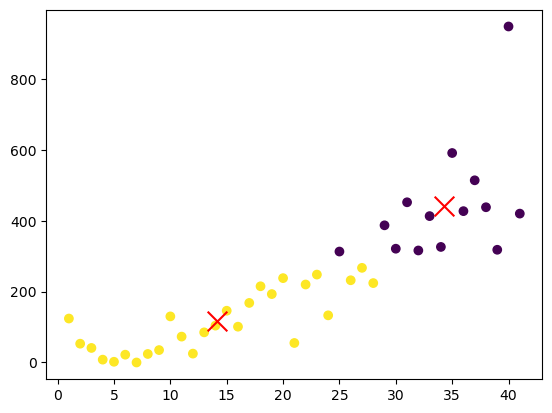

In [129]:
feature = 'activity'
kmeans(feature)

/home/yanboyang713/.conda/envs/project-health/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


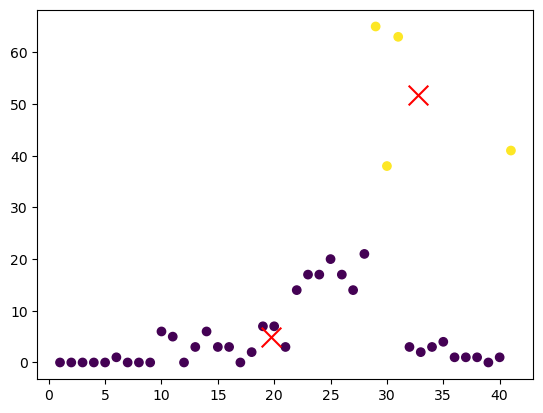

In [131]:
feature = 'monthly_open_PRs'
kmeans(feature)

/home/yanboyang713/.conda/envs/project-health/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


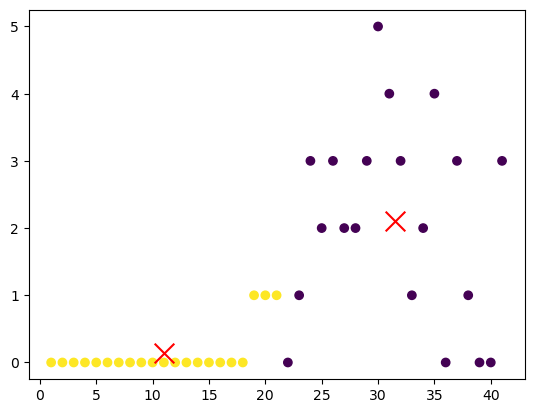

In [132]:
feature = 'monthly_closed_PRs'
kmeans(feature)

/home/yanboyang713/.conda/envs/project-health/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


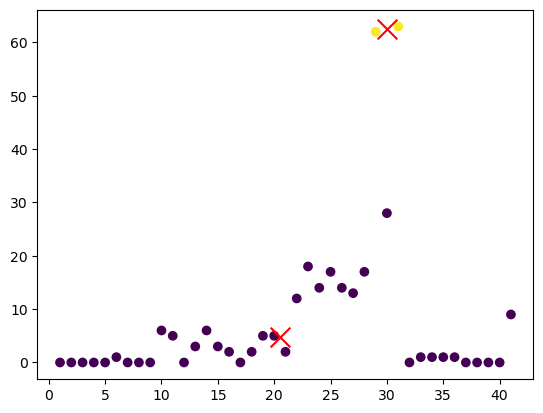

In [133]:
feature = 'monthly_merged_PRs'
kmeans(feature)

/home/yanboyang713/.conda/envs/project-health/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


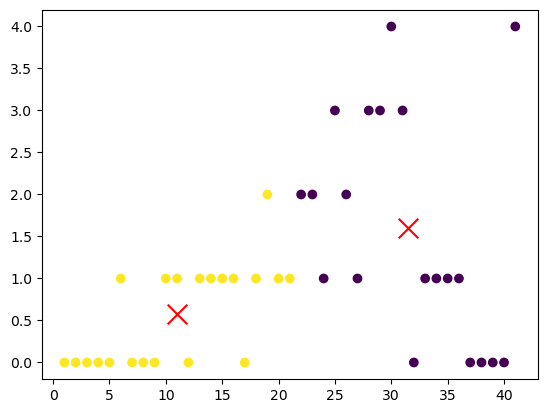

In [134]:
feature = 'monthly_PR_mergers'
kmeans(feature)

/home/yanboyang713/.conda/envs/project-health/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


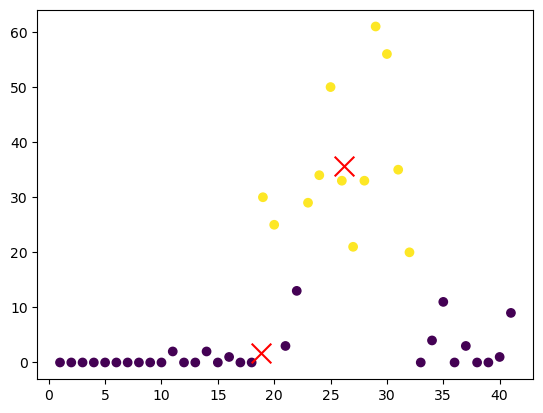

In [135]:
feature = 'monthly_PR_comments'
kmeans(feature)

/home/yanboyang713/.conda/envs/project-health/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


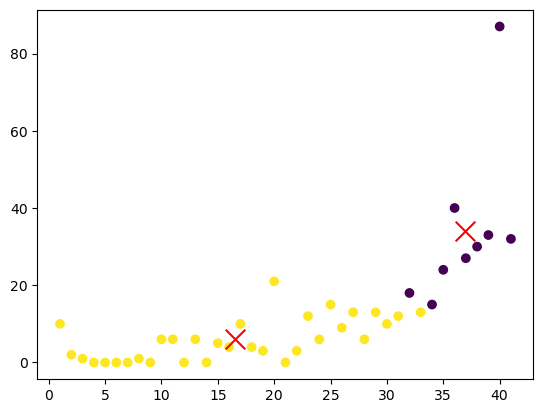

In [136]:
feature = 'monthly_open_issues'
kmeans(feature)

/home/yanboyang713/.conda/envs/project-health/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


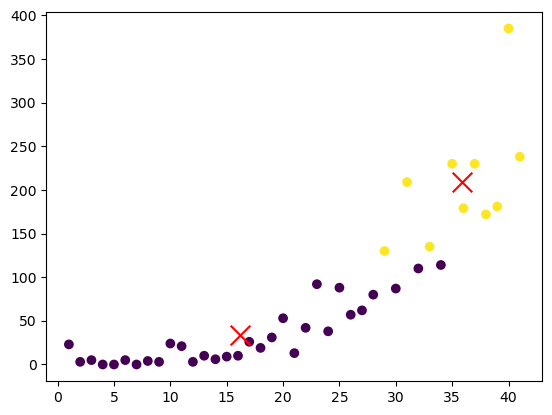

In [126]:
feature = 'monthly_closed_issues'
kmeans(feature)

/home/yanboyang713/.conda/envs/project-health/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


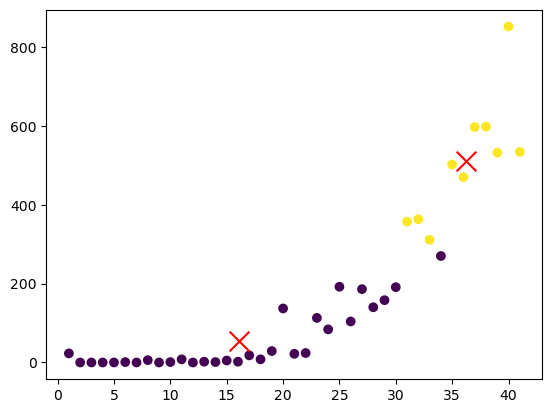

In [137]:
feature = 'monthly_issue_comments'
kmeans(feature)

/home/yanboyang713/.conda/envs/project-health/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


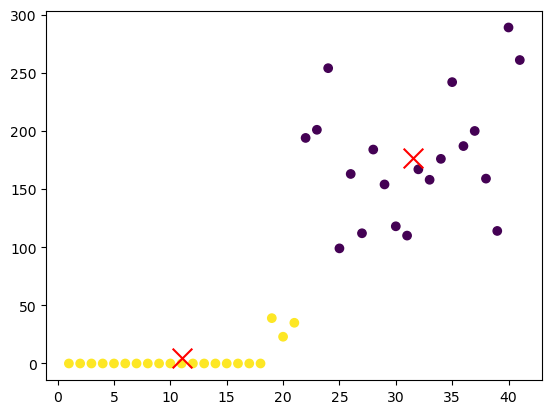

In [138]:
feature = 'monthly_stargazer'
kmeans(feature)

/home/yanboyang713/.conda/envs/project-health/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


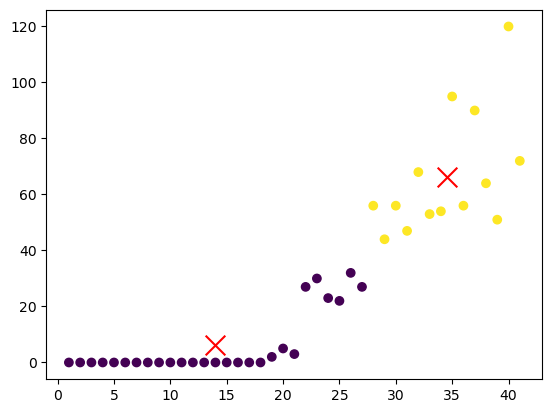

In [139]:
feature = 'monthly_forks'
kmeans(feature)

/home/yanboyang713/.conda/envs/project-health/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


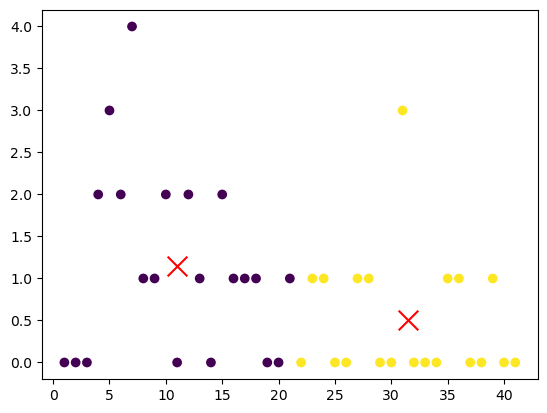

In [140]:
feature = 'monthly_watchers'
kmeans(feature)

In [141]:
data.head(3)

,monthly_commits,monthly_contributors,monthly_open_PRs,monthly_closed_PRs,monthly_merged_PRs,monthly_PR_mergers,monthly_PR_comments,monthly_open_issues,monthly_closed_issues,monthly_issue_comments,...,monthly_open_PRs_labels,monthly_closed_PRs_labels,monthly_merged_PRs_labels,monthly_PR_mergers_labels,monthly_PR_comments_labels,monthly_open_issues_labels,monthly_issue_comments_labels,monthly_stargazer_labels,monthly_forks_labels,monthly_watchers_labels
dates,,,,,,,,,,,,,,,,,,,,,
2016-12-01,123,1,0,0,0,0,0,10,23,23,...,0,1,0,1,0,1,0,1,0,0
2017-01-01,52,1,0,0,0,0,0,2,3,0,...,0,1,0,1,0,1,0,1,0,0
2017-02-01,40,1,0,0,0,0,0,1,5,0,...,0,1,0,1,0,1,0,1,0,0


# Check overlap

overlap is unhealth
monthly_open_PRs' 'monthly_closed_PRs'
result good

In [144]:
# Select and display only the desired columns
selected_columns = data[['monthly_open_PRs','monthly_open_PRs_labels', 'monthly_closed_PRs', 'monthly_closed_PRs_labels']]
selected_columns

,monthly_open_PRs,monthly_open_PRs_labels,monthly_closed_PRs,monthly_closed_PRs_labels
dates,,,,
2016-12-01,0,0,0,1
2017-01-01,0,0,0,1
2017-02-01,0,0,0,1
2017-03-01,0,0,0,1
2017-04-01,0,0,0,1
2017-05-01,1,0,0,1
2017-06-01,0,0,0,1
2017-07-01,0,0,0,1
2017-08-01,0,0,0,1


In [ ]:
overlap is unhealth
monthly_open_PRs' 'activity'
result not good

In [145]:
# Select and display only the desired columns
selected_columns = data[['monthly_open_PRs','monthly_open_PRs_labels', 'activity', 'activity_labels']]
selected_columns

,monthly_open_PRs,monthly_open_PRs_labels,activity,activity_labels
dates,,,,
2016-12-01,0,0,124,1
2017-01-01,0,0,53,1
2017-02-01,0,0,41,1
2017-03-01,0,0,8,1
2017-04-01,0,0,2,1
2017-05-01,1,0,22,1
2017-06-01,0,0,0,1
2017-07-01,0,0,24,1
2017-08-01,0,0,35,1


overlap is unhealth
monthly_closed_issues' 'monthly_closed_PRs'
result not good

In [143]:
# Select and display only the desired columns
selected_columns = data[['monthly_closed_issues','monthly_closed_issues_labels', 'monthly_closed_PRs', 'monthly_closed_PRs_labels']]
selected_columns

,monthly_closed_issues,monthly_closed_issues_labels,monthly_closed_PRs,monthly_closed_PRs_labels
dates,,,,
2016-12-01,23,0,0,1
2017-01-01,3,0,0,1
2017-02-01,5,0,0,1
2017-03-01,0,0,0,1
2017-04-01,0,0,0,1
2017-05-01,5,0,0,1
2017-06-01,0,0,0,1
2017-07-01,4,0,0,1
2017-08-01,3,0,0,1


'monthly_open_issues', 'monthly_closed_issues'

In [146]:
# Select and display only the desired columns
selected_columns = data[['monthly_open_issues','monthly_open_issues_labels', 'monthly_closed_issues', 'monthly_closed_issues_labels']]
selected_columns

,monthly_open_issues,monthly_open_issues_labels,monthly_closed_issues,monthly_closed_issues_labels
dates,,,,
2016-12-01,10,1,23,0
2017-01-01,2,1,3,0
2017-02-01,1,1,5,0
2017-03-01,0,1,0,0
2017-04-01,0,1,0,0
2017-05-01,0,1,5,0
2017-06-01,0,1,0,0
2017-07-01,1,1,4,0
2017-08-01,0,1,3,0


monthly_issue_comments
monthly_open_PRs

In [148]:
# Select and display only the desired columns
selected_columns = data[['monthly_issue_comments','monthly_issue_comments_labels', 'monthly_open_PRs', 'monthly_open_PRs_labels']]
selected_columns

,monthly_issue_comments,monthly_issue_comments_labels,monthly_open_PRs,monthly_open_PRs_labels
dates,,,,
2016-12-01,23,0,0,0
2017-01-01,0,0,0,0
2017-02-01,0,0,0,0
2017-03-01,0,0,0,0
2017-04-01,0,0,0,0
2017-05-01,1,0,1,0
2017-06-01,0,0,0,0
2017-07-01,6,0,0,0
2017-08-01,0,0,0,0


# KMedoids

In [151]:
from sklearn_extra.cluster import KMedoids
import numpy as np

# Create a sample dataset
data = np.array([[1, 2], [5, 8], [1, 5], [8, 8], [9, 10]])

# Initialize the K-Medoids model with the number of clusters (k) and other parameters
k = 2
kmedoids = KMedoids(n_clusters=k, random_state=0)

# Fit the model to your data
kmedoids.fit(data)

# Get the cluster medoids and labels
medoids = kmedoids.medoid_indices_
labels = kmedoids.labels_

print("Cluster Medoids:", medoids)
print("Cluster Labels:", labels)


Cluster Medoids: [2 3]
Cluster Labels: [0 1 0 1 1]


# BIRCH

Cluster Labels: [0 2 0 1 1]


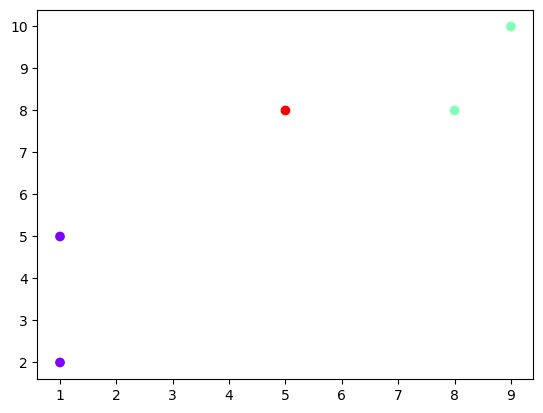

In [3]:
from sklearn.cluster import Birch
import numpy as np

# Create a sample dataset
data = np.array([[1, 2], [5, 8], [1, 5], [8, 8], [9, 10]])

# Create a BIRCH clustering model
birch = Birch(threshold=0.5, branching_factor=50)

# Fit the model to your data
birch.fit(data)

# Predict the clusters for your data points
labels = birch.predict(data)

# Access the cluster centers
cluster_centers = birch.subcluster_centers_

# Access the number of clusters found
n_clusters = birch.n_clusters

labels = birch.labels_
print("Cluster Labels:", labels)
# You can also use birch.fit_predict(data) to fit and predict in one step

# To visualize the clusters, you can use a plotting library like Matplotlib
import matplotlib.pyplot as plt

# Assuming data is a 2D array
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='rainbow')
plt.show()


/home/yanboyang713/.conda/envs/project-health/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/yanboyang713/.conda/envs/project-health/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/yanboyang713/.conda/envs/project-health/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/yanboyang713/.conda/envs/project-health/lib/python3.11/site-packages/skle

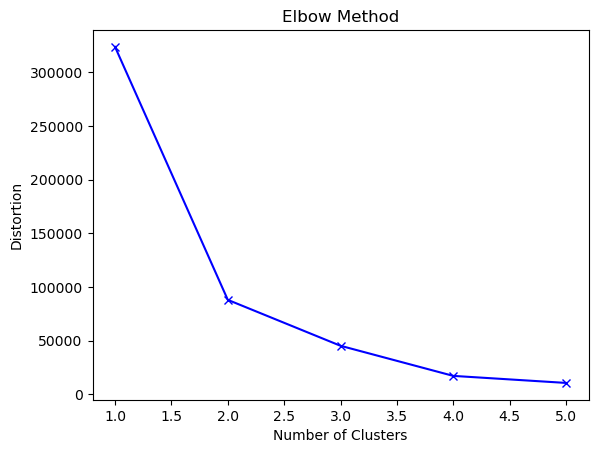

In [80]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

distortions = []
K = range(1, 6)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

/home/yanboyang713/.conda/envs/project-health/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


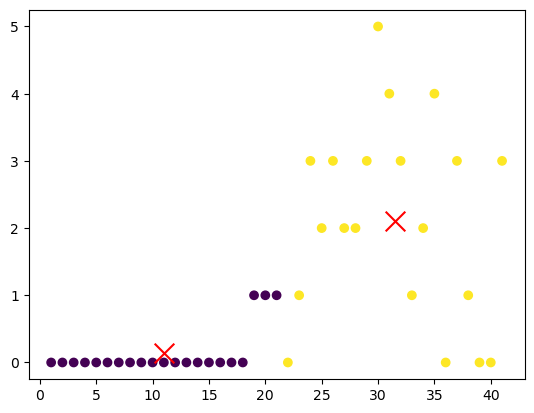

In [90]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Example data as a NumPy array
#data = np.array([[2, 3], [4, 6], [8, 8], [3, 2], [10, 11], [15, 13]])

# Convert the data to a Pandas DataFrame
#df = pd.DataFrame(data, columns=['monthly_open_issues', 'monthly_closed_issues'])
df = pd.DataFrame(data, columns=['ID', 'monthly_closed_PRs'])

# Number of clusters
k = 2

# Create and fit KMeans model
kmeans = KMeans(n_clusters=k)
kmeans.fit(df)

# Get cluster labels and centers
labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

# Visualize the clusters
plt.scatter(df['ID'], df['monthly_closed_PRs'], c=labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=200)
plt.show()

In [91]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [92]:
data['monthly_closed_PRs_labels'] = labels

In [93]:
print(data.head(3))

        dates  monthly_commits  monthly_contributors  monthly_open_PRs  \
0  2016-12-01              123                     1                 0   
1  2017-01-01               52                     1                 0   
2  2017-02-01               40                     1                 0   

   monthly_closed_PRs  monthly_merged_PRs  monthly_PR_mergers  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   

   monthly_PR_comments  monthly_open_issues  monthly_closed_issues  \
0                    0                   10                     23   
1                    0                    2                      3   
2                    0                    1                      5   

   monthly_issue_comments  monthly_stargazer  monthly_forks  monthly_watchers  \
0                      23                  0              0                 0   

In [95]:
# Select and display only the desired columns
selected_columns = data[['monthly_closed_issues','monthly_closed_issues_labels', 'monthly_closed_PRs', 'monthly_closed_PRs_labels']]
print(selected_columns)

    monthly_closed_issues  monthly_closed_issues_labels  monthly_closed_PRs  \
0                      23                             1                   0   
1                       3                             1                   0   
2                       5                             1                   0   
3                       0                             1                   0   
4                       0                             1                   0   
5                       5                             1                   0   
6                       0                             1                   0   
7                       4                             1                   0   
8                       3                             1                   0   
9                      24                             1                   0   
10                     21                             1                   0   
11                      3                           

/home/yanboyang713/.conda/envs/project-health/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/yanboyang713/.conda/envs/project-health/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/yanboyang713/.conda/envs/project-health/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


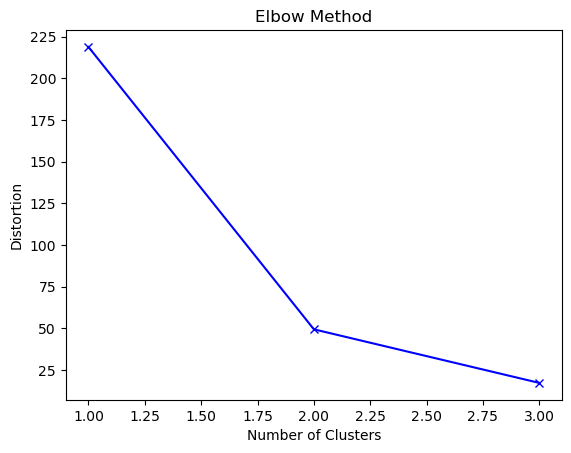

In [56]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

distortions = []
K = range(1, 4)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data)
    distortions.append(kmeanModel.inertia_)

plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

/home/yanboyang713/.conda/envs/project-health/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/yanboyang713/.conda/envs/project-health/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


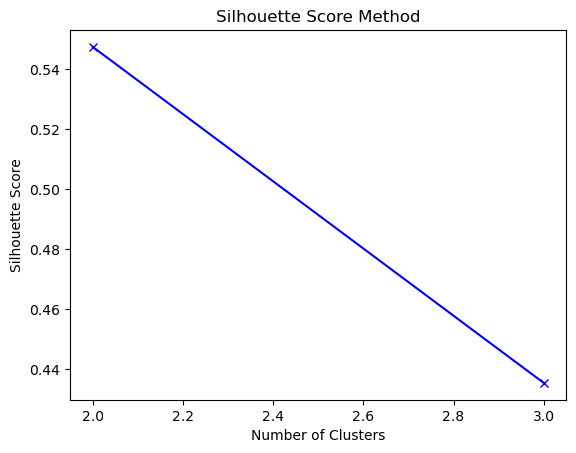

In [58]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
K = range(2, 4)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    labels = kmeanModel.fit_predict(data)
    silhouette_scores.append(silhouette_score(data, labels))

plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.show()


/home/yanboyang713/.conda/envs/project-health/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


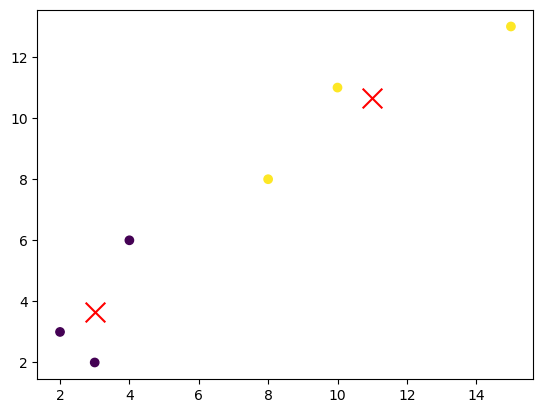

In [59]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Example data as a NumPy array
data = np.array([[2, 3], [4, 6], [8, 8], [3, 2], [10, 11], [15, 13]])

# Convert the data to a Pandas DataFrame
df = pd.DataFrame(data, columns=['X', 'Y'])

# Number of clusters
k = 2

# Create and fit KMeans model
kmeans = KMeans(n_clusters=k)
kmeans.fit(df)

# Get cluster labels and centers
labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

# Visualize the clusters
plt.scatter(df['X'], df['Y'], c=labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=200)
plt.show()


In [60]:
df

,X,Y
0,2,3
1,4,6
2,8,8
3,3,2
4,10,11
5,15,13


In [1]:
def jaccard_similarity(set_a, set_b):
    """Compute the Jaccard Similarity between two sets."""
    intersection = len(set_a.intersection(set_b))
    union = len(set_a.union(set_b))
    return intersection / union if union != 0 else 0.0

# Example usage:
set1 = {"a", "b", "c"}
set2 = {"b", "c", "d"}
similarity = jaccard_similarity(set1, set2)
print(f"Jaccard Similarity: {similarity}")


Jaccard Similarity: 0.5


In [2]:
def hamming_distance(s1, s2):
    if len(s1) != len(s2):
        raise ValueError("Strings must be of the same length")
    return sum(c1 != c2 for c1, c2 in zip(s1, s2))
def hamming_similarity(s1, s2):
    distance = hamming_distance(s1, s2)
    return (len(s1) - distance) / len(s1)
    
s1 = "karolin"
s2 = "kathrin"

print(hamming_distance(s1, s2))
print(hamming_similarity(s1, s2))


3
0.5714285714285714


In [3]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances

def davies_bouldin_index(X, labels):
    n_cluster = len(np.bincount(labels))
    cluster_k = [X[labels == k] for k in range(n_cluster)]
    centroids = [np.mean(k, axis=0) for k in cluster_k]

    # Calculate the scatter (S_i) for each cluster
    S = [np.mean(pairwise_distances(cluster_k[i], [centroids[i]])) for i in range(n_cluster)]
    
    # Calculate the pairwise centroid distances (d(c_i, c_j))
    centroid_distances = pairwise_distances(centroids)
    np.fill_diagonal(centroid_distances, float('inf'))

    # Calculate the similarity (R_ij) between each pair of clusters
    R = np.zeros((n_cluster, n_cluster))
    for i in range(n_cluster):
        for j in range(n_cluster):
            if i != j:
                R[i, j] = (S[i] + S[j]) / centroid_distances[i, j]

    # Calculate the Davies–Bouldin index
    dbi = np.mean(np.max(R, axis=1))

    return dbi

# Sample dataset and clustering
X = np.array([[1, 2], [5, 8], [1.5, 1.8], [8, 8], [1, 0.6], [9, 11]])
kmeans = KMeans(n_clusters=2).fit(X)
labels = kmeans.labels_

# Calculate DBI
dbi_value = davies_bouldin_index(X, labels)
print(f"Davies–Bouldin index: {dbi_value}")


Davies–Bouldin index: 0.28269818402984925


/home/yanboyang713/.conda/envs/project-health/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [4]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np

# Sample data
data, _ = make_blobs(n_samples=300, centers=3, random_state=42)

# Sample clustering
kmeans = KMeans(n_clusters=3)
labels = kmeans.fit_predict(data)

# Silhouette coefficient
sil_coeff = silhouette_score(data, labels)
print(f"Silhouette Coefficient: {sil_coeff}")

# Dunn Index
def dunn_index(X, labels):
    # pairwise distance matrix
    distance_matrix = np.linalg.norm(X[:, np.newaxis] - X, axis=2)

    # For each cluster, compute the intra-cluster distance
    intra_cluster_distances = np.array([
        np.max(distance_matrix[labels == i][:, labels == i])
        for i in np.unique(labels)
    ])

    # For each pair of clusters, compute the inter-cluster distance
    inter_cluster_distances = np.array([
        np.min(distance_matrix[labels == i][:, labels == j])
        for i in np.unique(labels)
        for j in np.unique(labels)
        if i != j
    ])

    return np.min(inter_cluster_distances) / np.max(intra_cluster_distances)

di = dunn_index(data, labels)
print(f"Dunn Index: {di}")



Silhouette Coefficient: 0.8480303059596955
Dunn Index: 0.9484430301054111


/home/yanboyang713/.conda/envs/project-health/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [6]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

# Generate some sample data
X, _ = make_blobs(n_samples=500, centers=4, random_state=42, cluster_std=1.0)

# Apply KMeans clustering
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# Calculate the overall silhouette score
silhouette_avg = silhouette_score(X, cluster_labels)
print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}")

# Calculate the silhouette score for each sample
sample_silhouette_values = silhouette_samples(X, cluster_labels)


For n_clusters = 4, the average silhouette_score is : 0.7911042588289479


/home/yanboyang713/.conda/envs/project-health/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [8]:
from sklearn.metrics import adjusted_rand_score, pairwise_distances
import numpy as np

def rand_index_score(clusters_true, clusters_pred):
    """
    Compute the Rand Index between two clusterings.
    
    Parameters:
    - clusters_true : array-like, true labels
    - clusters_pred : array-like, predicted labels

    Returns:
    - ri : float, Rand Index
    """
    tp_fp = sum([len(np.where(clusters_pred == label)[0]) ** 2 for label in set(clusters_pred)])
    tp_fn = sum([len(np.where(clusters_true == label)[0]) ** 2 for label in set(clusters_true)])
    A = np.array([clusters_true == clusters_true[i] for i in range(len(clusters_true))])
    B = np.array([clusters_pred == clusters_pred[i] for i in range(len(clusters_pred))])
    tp = sum([(A[i] & B[i]).sum() for i in range(len(A))]) / 2
    fp = tp_fp / 2 - tp
    fn = tp_fn / 2 - tp
    tn = len(clusters_pred) ** 2 / 2 - tp - fp - fn
    ri = (tp + tn) / (tp + fp + fn + tn)
    return ri

# Sample data
true_clusters = [0, 0, 1, 1, 2, 2]
predicted_clusters = [0, 0, 1, 2, 2, 2]

# Calculate Rand Index
ri = rand_index_score(true_clusters, predicted_clusters)
print(f"Rand Index: {ri:.4f}")

# Calculate Adjusted Rand Index using sklearn
ari = adjusted_rand_score(true_clusters, predicted_clusters)
print(f"Adjusted Rand Index: {ari:.4f}")


Rand Index: 1.0000
Adjusted Rand Index: 0.4444


In [10]:
from sklearn.metrics import precision_score, recall_score

def f_beta_score(P, R, beta=1.0):
    """
    Compute the F_beta score.

    Parameters:
    - P (float): Precision
    - R (float): Recall
    - beta (float): Weighting factor

    Returns:
    - float: F_beta score
    """
    if P + R == 0:
        return 0.0  # Handle edge case to avoid division by zero
    return (1 + beta**2) * P * R / (beta**2 * P + R)

def compute_f_beta_from_labels(true_labels, predicted_labels, beta=1.0):
    """
    Compute the F_beta score from true and predicted labels.

    Parameters:
    - true_labels (list): Ground truth labels
    - predicted_labels (list): Predicted labels from clustering or classification
    - beta (float): Weighting factor

    Returns:
    - float: F_beta score
    """
    P = precision_score(true_labels, predicted_labels, average='macro')
    R = recall_score(true_labels, predicted_labels, average='macro')
    return f_beta_score(P, R, beta)

# Example usage:
true_labels = [1, 0, 1, 2, 2, 0]
predicted_labels = [1, 1, 1, 2, 0, 0]
beta = 2

print(compute_f_beta_from_labels(true_labels, predicted_labels, beta))


0.6770833333333334


In [12]:
from itertools import combinations
from math import sqrt

def fowlkes_mallows_index(labels_true, labels_pred):
    """
    Compute the Fowlkes-Mallows index for two clusterings.

    :param labels_true: List of ground truth cluster labels
    :param labels_pred: List of predicted cluster labels
    :return: Fowlkes-Mallows index
    """
    if len(labels_true) != len(labels_pred):
        raise ValueError("Both lists must have the same length")

    # Compute pairs
    pairs_true = {(i, j) for i in range(len(labels_true)) for j in range(i+1, len(labels_true)) if labels_true[i] == labels_true[j]}
    pairs_pred = {(i, j) for i in range(len(labels_pred)) for j in range(i+1, len(labels_pred)) if labels_pred[i] == labels_pred[j]}

    TP = len(pairs_true & pairs_pred)
    FP = len(pairs_pred - pairs_true)
    FN = len(pairs_true - pairs_pred)

    if TP == 0:
        return 0.0
    else:
        return TP / sqrt((TP + FP) * (TP + FN))

# Example usage
labels_true = [0, 0, 1, 1, 2, 2]
labels_pred = [0, 0, 1, 2, 2, 2]
print(fowlkes_mallows_index(labels_true, labels_pred))  # This should print the FM index for the given clusterings


0.5773502691896258


In [13]:
import numpy as np
from sklearn.metrics import confusion_matrix

def mutual_information(U, V):
    # Compute the joint probability matrix
    joint_prob = confusion_matrix(U, V) / float(len(U))
    
    # Compute the marginal probabilities
    prob_U = np.sum(joint_prob, axis=1)
    prob_V = np.sum(joint_prob, axis=0)
    
    # Compute mutual information
    MI = 0.0
    for i in range(len(prob_U)):
        for j in range(len(prob_V)):
            if joint_prob[i][j] > 0:
                MI += joint_prob[i][j] * np.log2(joint_prob[i][j] / (prob_U[i] * prob_V[j]))
    return MI

def entropy(labels):
    prob = np.bincount(labels) / float(len(labels))
    return -np.sum(p * np.log2(p) for p in prob if p > 0)

def normalized_mutual_information(U, V):
    MI = mutual_information(U, V)
    entropy_U = entropy(U)
    entropy_V = entropy(V)
    return 2 * MI / (entropy_U + entropy_V)

# Example
true_labels = [0, 0, 1, 1, 2, 2]
cluster_labels = [0, 0, 2, 1, 2, 2]

print("MI:", mutual_information(true_labels, cluster_labels))
print("NMI:", normalized_mutual_information(true_labels, cluster_labels))


MI: 1.1258145836939113
NMI: 0.739667376800759


/tmp/ipykernel_70179/375929187.py:22: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return -np.sum(p * np.log2(p) for p in prob if p > 0)


In [287]:
!mamba install -y imbalanced-learn


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.2) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['imbalanced-learn']

error    libmamba Could not open lockfile '/opt/mambaforge/pkgs/cache/cache.lo

In [278]:
!mamba install -y lightgbm


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.2) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['lightgbm']

error    libmamba Could not open lockfile '/opt/mambaforge/pkgs/cache/cache.lock'
erro

In [289]:
!mamba install -y tensorflow-cpu


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.2) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['tensorflow-cpu']

error    libmamba Could not open lockfile '/opt/mambaforge/pkgs/cache/cache.lock

In [291]:
import tensorflow as tf
print(tf.__version__)

2.13.1


In [293]:
!mamba install -c conda-forge -y hyperopt


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.2) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['hyperopt']

error    libmamba Could not open lockfile '/opt/mambaforge/pkgs/cache/cache.lock'
erro

In [294]:
import pandas as pd
import csv
import os
import sys
import csv
import time
import numpy as np
import random

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#sys.path.insert(0, f"{os.path.dirname(os.getcwd())}/src")
sys.path.insert(0, f"./src")
from utils import evaluate_result
from data_imbalance_src.smote_oversampling import RandomOversampling, ADASYNOversampling, BorderlineSMOTEOversampling, SMOTEOversampling, SVMSMOTEOversampling
from data_imbalance_src.smote_oversampling import SMOTUNEDOversampling
from data_imbalance_src.dazzle import DAZZLEOversampling
from data_imbalance_src.Imbalance_Farou2022.data_generation import GANOversampling
from data_imbalance_src.random_projection import RandomProjectionOversampling

# JavaScript_Vulnerability

In [307]:
write_file = "JS_Vuln_res_r8.csv"
write_path = f"./result/{write_file}"
with open(write_path, "w", newline="") as f:
    csv_writer = csv.writer(f)
    csv_writer.writerow(["oversampling_scheme", "runtime", "learner", "acc", "prec", "recall", "fpr", "f1", "auc", "g_score", "d2h"])

In [308]:
data_path = f"./data/JavaScript_Vulnerability/"
datafiles = [f for f in os.listdir(data_path) if f.endswith("csv")]
datafiles

['JSVulnerabilityDataSet-1.0.csv']

In [309]:
df = pd.read_csv(f"{data_path}/{datafiles[0]}")
drop_columns = ["name", "longname", "path", "full_repo_path", "line", "column", "endline", "endcolumn"]
df = df.drop(drop_columns, axis=1)
df = df.drop_duplicates()
df.reset_index(inplace=True, drop=True)

In [310]:
df

,CC,CCL,CCO,CI,CLC,CLLC,McCC,NL,NLE,CD,...,HVOC,HDIFF,HVOL,HEFF,HBUGS,HTIME,CYCL,PARAMS,CYCL_DENS,Vuln
0,0.0,0,0,0,0.0,0,3,1,1,0.000000,...,21,10.250000,342.600759,3511.657780,0.114200,195.092099,3,2,30.000000,1
1,0.0,0,0,0,0.0,0,11,3,3,0.041667,...,48,21.500000,893.594000,19212.271002,0.297865,1067.348389,9,3,37.500000,1
2,0.0,0,0,0,0.0,0,1,0,0,0.000000,...,10,1.928571,43.185065,83.285483,0.014395,4.626971,1,4,100.000000,1
3,0.0,0,0,0,0.0,0,1,0,0,0.000000,...,10,1.928571,43.185065,83.285483,0.014395,4.626971,1,4,100.000000,0
4,0.0,0,0,0,0.0,0,3,2,2,0.000000,...,37,8.703704,416.756269,3627.323084,0.138919,201.517949,3,3,30.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6266,0.0,0,0,0,0.0,0,2,1,1,0.000000,...,20,3.857143,142.623627,550.119705,0.047541,30.562206,2,2,33.333333,0
6267,0.0,0,0,0,0.0,0,2,1,1,0.000000,...,12,3.250000,75.284213,244.673691,0.025095,13.592983,2,2,40.000000,0
6268,0.0,0,0,0,0.0,0,6,4,4,0.000000,...,49,13.800000,724.297570,9995.306464,0.241433,555.294804,6,1,31.578947,1
6269,0.0,0,0,0,0.0,0,2,1,1,0.000000,...,19,6.071429,267.619433,1624.832274,0.089206,90.268460,2,2,18.181818,0


In [311]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
print("y value counts: \n", str(y.value_counts()))
print("y class ratio: 1:", str(round(y.value_counts()[0]/y.value_counts()[1])))

y value counts: 
 Vuln
0    5367
1     904
Name: count, dtype: int64
y class ratio: 1: 6


In [312]:
rs = random.randint(0, 100000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=rs)
print("--- y train classes count: \n" + str(y_train.value_counts()))
print("--- y train ratio: 1:" + str(round(y_train.value_counts()[0] / y_train.value_counts()[1])))
print(" ")
print("--- y test classes count: \n" + str(y_test.value_counts()))
print("--- y test ratio: 1:" + str(round(y_test.value_counts()[0] / y_test.value_counts()[1])))

--- y train classes count: 
Vuln
0    4293
1     723
Name: count, dtype: int64
--- y train ratio: 1:6
 
--- y test classes count: 
Vuln
0    1074
1     181
Name: count, dtype: int64
--- y test ratio: 1:6


## Normal Run

In [314]:
# normal run - without any oversampling technique
# inputs: X_train, y_train, X_test, y_test

# scale data
scaler = StandardScaler()
X_train_scale = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scale = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

# create models
clf_SVM = SVC()
#clf_KNN = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
clf_LR = LogisticRegression(random_state=42, solver="saga", max_iter=20000, n_jobs=-1)
clf_DT = DecisionTreeClassifier()
clf_RF = RandomForestClassifier(random_state=42, n_jobs=-1)
clf_LightGBM = LGBMClassifier(objective="binary", random_state=42, n_jobs=-1)
clf_Adaboost = AdaBoostClassifier(n_estimators=100, random_state=42)
clf_GBDT = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, random_state=42)

clf_SVM.fit(X_train_scale, y_train)
#clf_KNN.fit(X_train_scale, y_train)
clf_LR.fit(X_train_scale, y_train)
clf_DT.fit(X_train_scale, y_train)
clf_RF.fit(X_train_scale, y_train)
clf_LightGBM.fit(X_train_scale, y_train)
clf_Adaboost.fit(X_train_scale, y_train)
clf_GBDT.fit(X_train_scale, y_train)

y_pred_SVM = clf_SVM.predict(X_test_scale)
#y_pred_KNN = clf_KNN.predict(X_test_scale)
y_pred_LR = clf_LR.predict(X_test_scale)
y_pred_DT = clf_DT.predict(X_test_scale)
y_pred_RF = clf_RF.predict(X_test_scale)
y_pred_LightGBM = clf_LightGBM.predict(X_test_scale)
y_pred_Adaboost = clf_Adaboost.predict(X_test_scale)
y_pred_GBDT = clf_GBDT.predict(X_test_scale)

[LightGBM] [Info] Number of positive: 723, number of negative: 4293
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000461 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3909
[LightGBM] [Info] Number of data points in the train set: 5016, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.144139 -> initscore=-1.781332
[LightGBM] [Info] Start training from score -1.781332


In [316]:
with open(f"./result/{write_file}", "a", newline="") as f:
    csv_writer = csv.writer(f)
    
    csv_writer.writerow(["No", 0, "SVM"] + evaluate_result(y_pred_SVM, y_test))
    #csv_writer.writerow(["No", 0, "KNN"] + evaluate_result(y_pred_KNN, y_test))
    csv_writer.writerow(["No", 0, "LR"] + evaluate_result(y_pred_LR, y_test))
    csv_writer.writerow(["No", 0, "DT"] + evaluate_result(y_pred_DT, y_test))
    csv_writer.writerow(["No", 0, "RF"] + evaluate_result(y_pred_RF, y_test))
    csv_writer.writerow(["No", 0, "LightGBM"] + evaluate_result(y_pred_LightGBM, y_test))
    csv_writer.writerow(["No", 0, "Adaboost"] + evaluate_result(y_pred_Adaboost, y_test))
    csv_writer.writerow(["No", 0, "GBDT"] + evaluate_result(y_pred_GBDT, y_test))

## Random Oversampling

In [317]:
# random oversampling run - random oversampling technique
# inputs: X_train_random, y_train_random, X_test, y_test

rt, X_train_new, y_train_new = RandomOversampling(X_train=X_train, y_train=y_train)

# scale data
scaler = StandardScaler()
X_train_scale = pd.DataFrame(scaler.fit_transform(X_train_new), columns=X_train_new.columns, index=X_train_new.index)
X_test_scale = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

print("y train ratio: 1:" + str(round(y_train_new.value_counts()[0] / y_train_new.value_counts()[1])))

# create models
clf_SVM = SVC()
#clf_KNN = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
clf_LR = LogisticRegression(random_state=42, solver="saga", max_iter=20000, n_jobs=-1)
clf_DT = DecisionTreeClassifier()
clf_RF = RandomForestClassifier(random_state=42, n_jobs=-1)
clf_LightGBM = LGBMClassifier(objective="binary", random_state=42, n_jobs=-1)
clf_Adaboost = AdaBoostClassifier(n_estimators=100, random_state=42)
clf_GBDT = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, random_state=42)

clf_SVM.fit(X_train_new, y_train_new)
#clf_KNN.fit(X_train_new, y_train_new)
clf_LR.fit(X_train_new, y_train_new)
clf_DT.fit(X_train_new, y_train_new)
clf_RF.fit(X_train_new, y_train_new)
clf_LightGBM.fit(X_train_new, y_train_new)
clf_Adaboost.fit(X_train_new, y_train_new)
clf_GBDT.fit(X_train_new, y_train_new)

y_pred_SVM = clf_SVM.predict(X_test)
#y_pred_KNN = clf_KNN.predict(X_test)
y_pred_LR = clf_LR.predict(X_test)
y_pred_DT = clf_DT.predict(X_test)
y_pred_RF = clf_RF.predict(X_test)
y_pred_LightGBM = clf_LightGBM.predict(X_test)
y_pred_Adaboost = clf_Adaboost.predict(X_test)
y_pred_GBDT = clf_GBDT.predict(X_test)

y train ratio: 1:1
[LightGBM] [Info] Number of positive: 4293, number of negative: 4293
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000525 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3989
[LightGBM] [Info] Number of data points in the train set: 8586, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [319]:
with open(f"./result/{write_file}", "a", newline="") as f:
    csv_writer = csv.writer(f)
    
    csv_writer.writerow(["Random", rt, "SVM"] + evaluate_result(y_pred_SVM, y_test))
    #csv_writer.writerow(["Random", rt, "KNN"] + evaluate_result(y_pred_KNN, y_test))
    csv_writer.writerow(["Random", rt, "LR"] + evaluate_result(y_pred_LR, y_test))
    csv_writer.writerow(["Random", rt, "DT"] + evaluate_result(y_pred_DT, y_test))
    csv_writer.writerow(["Random", rt, "RF"] + evaluate_result(y_pred_RF, y_test))
    csv_writer.writerow(["Random", rt, "LightGBM"] + evaluate_result(y_pred_LightGBM, y_test))
    csv_writer.writerow(["Random", rt, "Adaboost"] + evaluate_result(y_pred_Adaboost, y_test))
    csv_writer.writerow(["Random", rt, "GBDT"] + evaluate_result(y_pred_GBDT, y_test))

## ADASYN Oversampling

In [320]:
# ADASYN oversampling run - ADASYN oversampling technique
# inputs: X_train_random, y_train_random, X_test, y_test

rt, X_train_new, y_train_new = ADASYNOversampling(X_train=X_train, y_train=y_train)

# scale data
scaler = StandardScaler()
X_train_scale = pd.DataFrame(scaler.fit_transform(X_train_new), columns=X_train_new.columns, index=X_train_new.index)
X_test_scale = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

print("y train ratio: 1:" + str(round(y_train_new.value_counts()[0] / y_train_new.value_counts()[1])))

# create models
clf_SVM = SVC()
#clf_KNN = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
clf_LR = LogisticRegression(random_state=42, solver="saga", max_iter=20000, n_jobs=-1)
clf_DT = DecisionTreeClassifier()
clf_RF = RandomForestClassifier(random_state=42, n_jobs=-1)
clf_LightGBM = LGBMClassifier(objective="binary", random_state=42, n_jobs=-1)
clf_Adaboost = AdaBoostClassifier(n_estimators=100, random_state=42)
clf_GBDT = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, random_state=42)

clf_SVM.fit(X_train_new, y_train_new)
#clf_KNN.fit(X_train_new, y_train_new)
clf_LR.fit(X_train_new, y_train_new)
clf_DT.fit(X_train_new, y_train_new)
clf_RF.fit(X_train_new, y_train_new)
clf_LightGBM.fit(X_train_new, y_train_new)
clf_Adaboost.fit(X_train_new, y_train_new)
clf_GBDT.fit(X_train_new, y_train_new)

y_pred_SVM = clf_SVM.predict(X_test)
#y_pred_KNN = clf_KNN.predict(X_test)
y_pred_LR = clf_LR.predict(X_test)
y_pred_DT = clf_DT.predict(X_test)
y_pred_RF = clf_RF.predict(X_test)
y_pred_LightGBM = clf_LightGBM.predict(X_test)
y_pred_Adaboost = clf_Adaboost.predict(X_test)
y_pred_GBDT = clf_GBDT.predict(X_test)

y train ratio: 1:1
[LightGBM] [Info] Number of positive: 4425, number of negative: 4293
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001108 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5294
[LightGBM] [Info] Number of data points in the train set: 8718, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507571 -> initscore=0.030284
[LightGBM] [Info] Start training from score 0.030284


In [321]:
with open(f"./result/{write_file}", "a", newline="") as f:
    csv_writer = csv.writer(f)
    
    csv_writer.writerow(["ADASYN", rt, "SVM"] + evaluate_result(y_pred_SVM, y_test))
    #csv_writer.writerow(["ADASYN", rt, "KNN"] + evaluate_result(y_pred_KNN, y_test))
    csv_writer.writerow(["ADASYN", rt, "LR"] + evaluate_result(y_pred_LR, y_test))
    csv_writer.writerow(["ADASYN", rt, "DT"] + evaluate_result(y_pred_DT, y_test))
    csv_writer.writerow(["ADASYN", rt, "RF"] + evaluate_result(y_pred_RF, y_test))
    csv_writer.writerow(["ADASYN", rt, "LightGBM"] + evaluate_result(y_pred_LightGBM, y_test))
    csv_writer.writerow(["ADASYN", rt, "Adaboost"] + evaluate_result(y_pred_Adaboost, y_test))
    csv_writer.writerow(["ADASYN", rt, "GBDT"] + evaluate_result(y_pred_GBDT, y_test))

## BorderlineSMOTE Oversampling

In [322]:
# BorderlineSMOTE oversampling run - BorderlineSMOTE oversampling technique
# inputs: X_train_random, y_train_random, X_test, y_test

rt, X_train_new, y_train_new = BorderlineSMOTEOversampling(X_train=X_train, y_train=y_train)

# scale data
scaler = StandardScaler()
X_train_scale = pd.DataFrame(scaler.fit_transform(X_train_new), columns=X_train_new.columns, index=X_train_new.index)
X_test_scale = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

print("y train ratio: 1:" + str(round(y_train_new.value_counts()[0] / y_train_new.value_counts()[1])))

# create models
clf_SVM = SVC()
#clf_KNN = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
clf_LR = LogisticRegression(random_state=42, solver="saga", max_iter=20000, n_jobs=-1)
clf_DT = DecisionTreeClassifier()
clf_RF = RandomForestClassifier(random_state=42, n_jobs=-1)
clf_LightGBM = LGBMClassifier(objective="binary", random_state=42, n_jobs=-1)
clf_Adaboost = AdaBoostClassifier(n_estimators=100, random_state=42)
clf_GBDT = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, random_state=42)

clf_SVM.fit(X_train_new, y_train_new)
#clf_KNN.fit(X_train_new, y_train_new)
clf_LR.fit(X_train_new, y_train_new)
clf_DT.fit(X_train_new, y_train_new)
clf_RF.fit(X_train_new, y_train_new)
clf_LightGBM.fit(X_train_new, y_train_new)
clf_Adaboost.fit(X_train_new, y_train_new)
clf_GBDT.fit(X_train_new, y_train_new)

y_pred_SVM = clf_SVM.predict(X_test)
#y_pred_KNN = clf_KNN.predict(X_test)
y_pred_LR = clf_LR.predict(X_test)
y_pred_DT = clf_DT.predict(X_test)
y_pred_RF = clf_RF.predict(X_test)
y_pred_LightGBM = clf_LightGBM.predict(X_test)
y_pred_Adaboost = clf_Adaboost.predict(X_test)
y_pred_GBDT = clf_GBDT.predict(X_test)

y train ratio: 1:1
[LightGBM] [Info] Number of positive: 4293, number of negative: 4293
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001090 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5352
[LightGBM] [Info] Number of data points in the train set: 8586, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [323]:
with open(f"./result/{write_file}", "a", newline="") as f:
    csv_writer = csv.writer(f)
    
    csv_writer.writerow(["BorderlineSMOTE", rt, "SVM"] + evaluate_result(y_pred_SVM, y_test))
    #csv_writer.writerow(["BorderlineSMOTE", rt, "KNN"] + evaluate_result(y_pred_KNN, y_test))
    csv_writer.writerow(["BorderlineSMOTE", rt, "LR"] + evaluate_result(y_pred_LR, y_test))
    csv_writer.writerow(["BorderlineSMOTE", rt, "DT"] + evaluate_result(y_pred_DT, y_test))
    csv_writer.writerow(["BorderlineSMOTE", rt, "RF"] + evaluate_result(y_pred_RF, y_test))
    csv_writer.writerow(["BorderlineSMOTE", rt, "LightGBM"] + evaluate_result(y_pred_LightGBM, y_test))
    csv_writer.writerow(["BorderlineSMOTE", rt, "Adaboost"] + evaluate_result(y_pred_Adaboost, y_test))
    csv_writer.writerow(["BorderlineSMOTE", rt, "GBDT"] + evaluate_result(y_pred_GBDT, y_test))

## SMOTE Oversampling

In [324]:
# SMOTE oversampling run - SMOTE oversampling technique
# inputs: X_train_random, y_train_random, X_test, y_test

rt, X_train_new, y_train_new = SMOTEOversampling(X_train=X_train, y_train=y_train)

# scale data
scaler = StandardScaler()
X_train_scale = pd.DataFrame(scaler.fit_transform(X_train_new), columns=X_train_new.columns, index=X_train_new.index)
X_test_scale = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

print("y train ratio: 1:" + str(round(y_train_new.value_counts()[0] / y_train_new.value_counts()[1])))

# create models
clf_SVM = SVC()
#clf_KNN = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
clf_LR = LogisticRegression(random_state=42, solver="saga", max_iter=20000, n_jobs=-1)
clf_DT = DecisionTreeClassifier()
clf_RF = RandomForestClassifier(random_state=42, n_jobs=-1)
clf_LightGBM = LGBMClassifier(objective="binary", random_state=42, n_jobs=-1)
clf_Adaboost = AdaBoostClassifier(n_estimators=100, random_state=42)
clf_GBDT = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, random_state=42)

clf_SVM.fit(X_train_new, y_train_new)
#clf_KNN.fit(X_train_new, y_train_new)
clf_LR.fit(X_train_new, y_train_new)
clf_DT.fit(X_train_new, y_train_new)
clf_RF.fit(X_train_new, y_train_new)
clf_LightGBM.fit(X_train_new, y_train_new)
clf_Adaboost.fit(X_train_new, y_train_new)
clf_GBDT.fit(X_train_new, y_train_new)

y_pred_SVM = clf_SVM.predict(X_test)
#y_pred_KNN = clf_KNN.predict(X_test)
y_pred_LR = clf_LR.predict(X_test)
y_pred_DT = clf_DT.predict(X_test)
y_pred_RF = clf_RF.predict(X_test)
y_pred_LightGBM = clf_LightGBM.predict(X_test)
y_pred_Adaboost = clf_Adaboost.predict(X_test)
y_pred_GBDT = clf_GBDT.predict(X_test)

y train ratio: 1:1
[LightGBM] [Info] Number of positive: 4293, number of negative: 4293
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001132 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5148
[LightGBM] [Info] Number of data points in the train set: 8586, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [325]:
with open(f"./result/{write_file}", "a", newline="") as f:
    csv_writer = csv.writer(f)
    
    csv_writer.writerow(["SMOTE", rt, "SVM"] + evaluate_result(y_pred_SVM, y_test))
    #csv_writer.writerow(["SMOTE", rt, "KNN"] + evaluate_result(y_pred_KNN, y_test))
    csv_writer.writerow(["SMOTE", rt, "LR"] + evaluate_result(y_pred_LR, y_test))
    csv_writer.writerow(["SMOTE", rt, "DT"] + evaluate_result(y_pred_DT, y_test))
    csv_writer.writerow(["SMOTE", rt, "RF"] + evaluate_result(y_pred_RF, y_test))
    csv_writer.writerow(["SMOTE", rt, "LightGBM"] + evaluate_result(y_pred_LightGBM, y_test))
    csv_writer.writerow(["SMOTE", rt, "Adaboost"] + evaluate_result(y_pred_Adaboost, y_test))
    csv_writer.writerow(["SMOTE", rt, "GBDT"] + evaluate_result(y_pred_GBDT, y_test))